In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
from tensorflow.keras import layers
import scipy.stats as stats
from tensorflow.keras.layers.experimental import preprocessing
# from deep_autoviml import deep_autoviml as deepauto
%matplotlib inline

In [2]:
df = pd.read_csv('finaluse.csv')
df.head()

,Unnamed: 0,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,0,36,4,0,0,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,True,2,965,126,285
1,1,36,17,1,1,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,True,1,965,181,285
2,2,36,4,0,0,34,6384,0.0,1812.0,144.0,129639.0,321554,172725.0,199452.0,True,1,965,181,285
3,3,36,4,0,0,34,6384,10300.0,1815.0,144.0,129639.0,321300,136127.0,199452.0,True,1,965,181,285
4,4,19,0,3,0,3296,3370,0.0,1818.0,144.0,129408.0,355768,136127.0,360833.0,True,1,965,181,285


In [3]:
df = df.drop(['Unnamed: 0'],axis = 1)
df.head(3)

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,36,4,0,0,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,True,2,965,126,285
1,36,17,1,1,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,True,1,965,181,285
2,36,4,0,0,34,6384,0.0,1812.0,144.0,129639.0,321554,172725.0,199452.0,True,1,965,181,285


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['conversion_fraud'] = le.fit_transform(df['conversion_fraud'])
df.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,36,4,0,0,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,1,2,965,126,285
1,36,17,1,1,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,1,1,965,181,285
2,36,4,0,0,34,6384,0.0,1812.0,144.0,129639.0,321554,172725.0,199452.0,1,1,965,181,285
3,36,4,0,0,34,6384,10300.0,1815.0,144.0,129639.0,321300,136127.0,199452.0,1,1,965,181,285
4,19,0,3,0,3296,3370,0.0,1818.0,144.0,129408.0,355768,136127.0,360833.0,1,1,965,181,285


In [5]:
test = df['conversion_fraud']
train = df.drop(['conversion_fraud'],axis = 1)
train.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,36,4,0,0,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,2,965,126,285
1,36,17,1,1,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,1,965,181,285
2,36,4,0,0,34,6384,0.0,1812.0,144.0,129639.0,321554,172725.0,199452.0,1,965,181,285
3,36,4,0,0,34,6384,10300.0,1815.0,144.0,129639.0,321300,136127.0,199452.0,1,965,181,285
4,19,0,3,0,3296,3370,0.0,1818.0,144.0,129408.0,355768,136127.0,360833.0,1,965,181,285


Feature clientid has Distribution of this kind


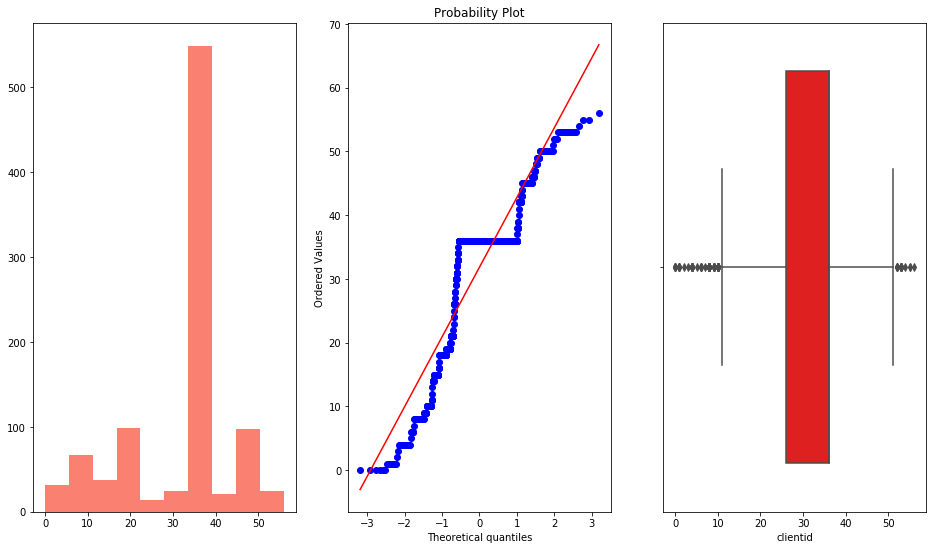

Feature pubclientid has Distribution of this kind


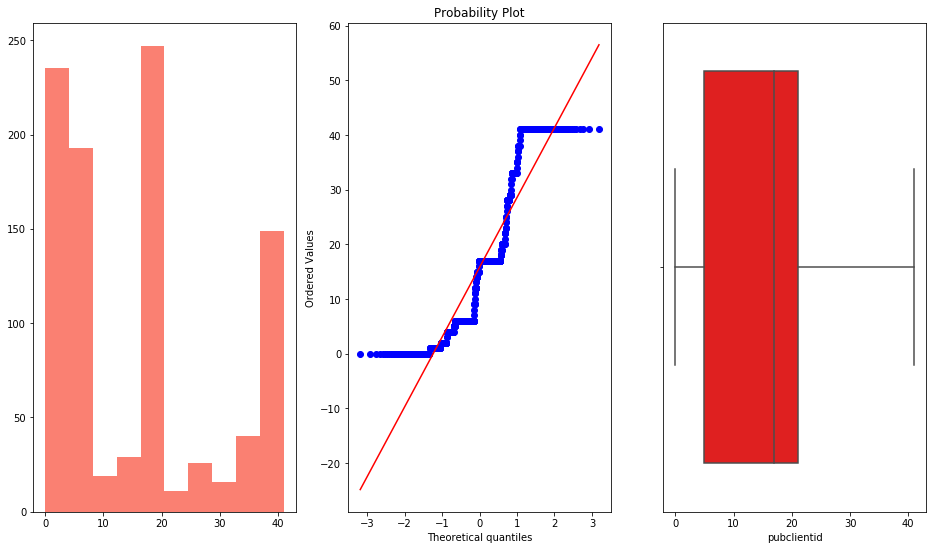

Feature clmbuserid has Distribution of this kind


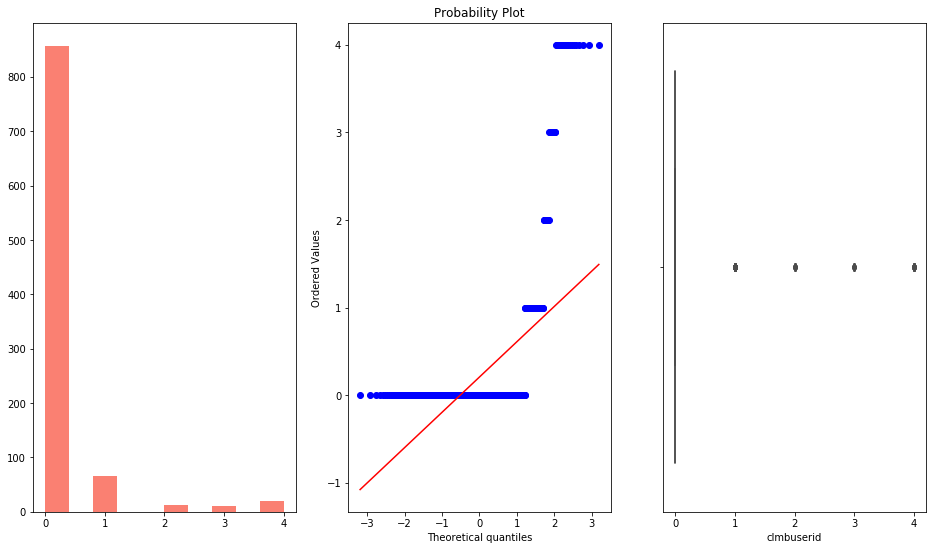

Feature imprid has Distribution of this kind


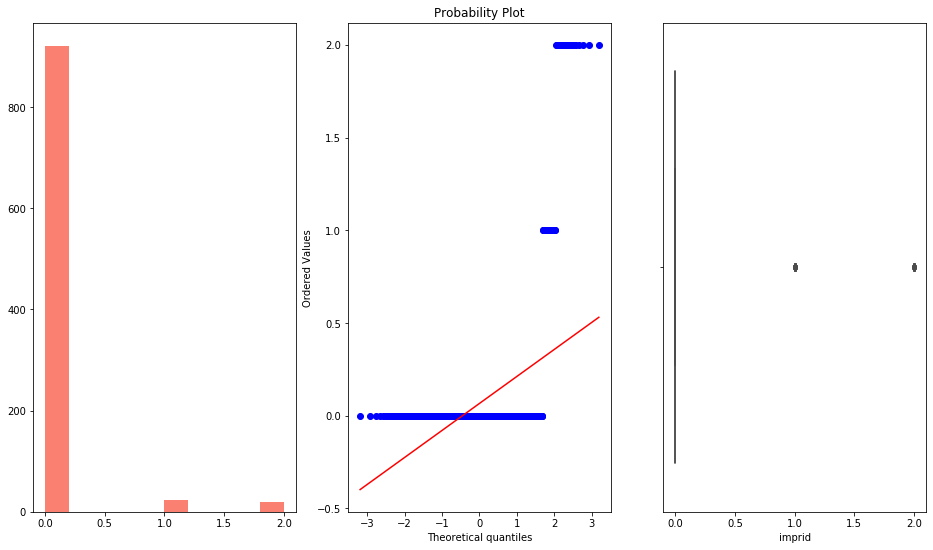

Feature siteId has Distribution of this kind


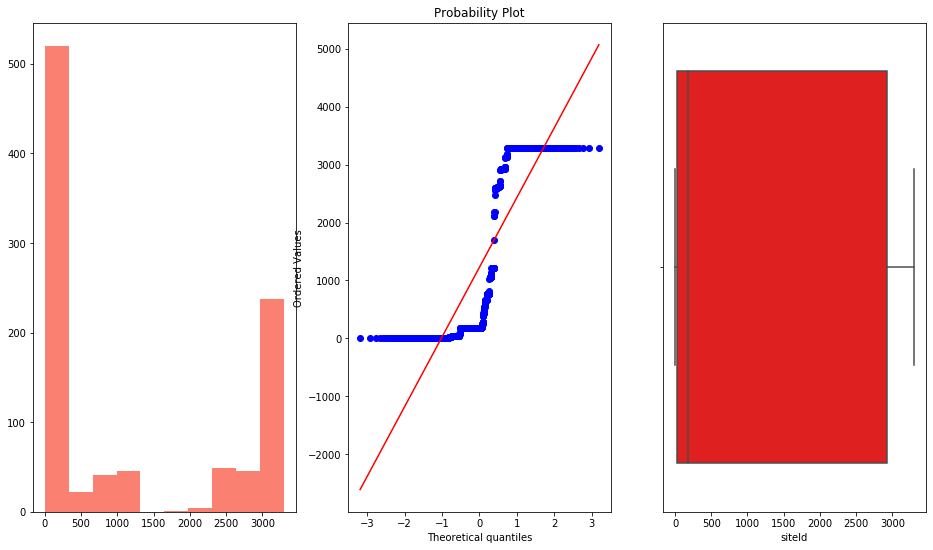

Feature goalid has Distribution of this kind


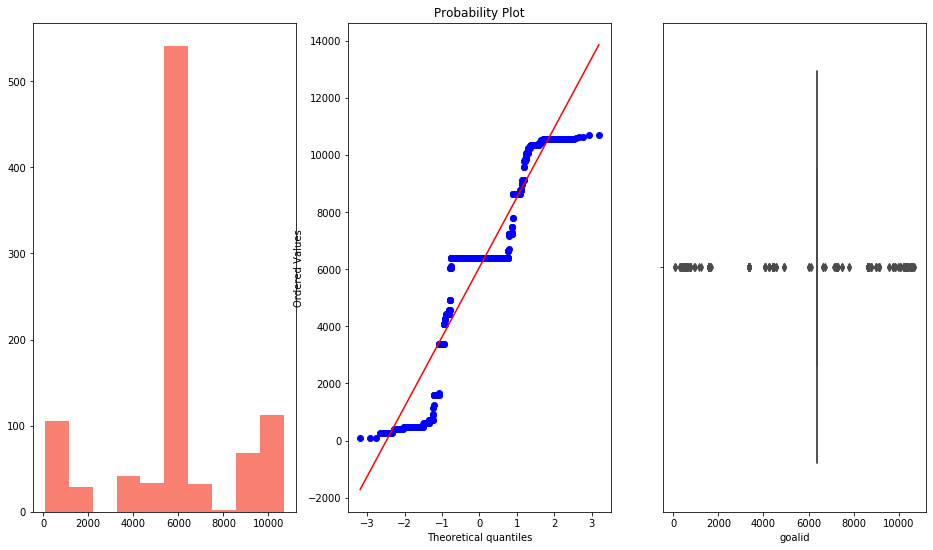

Feature cityId has Distribution of this kind


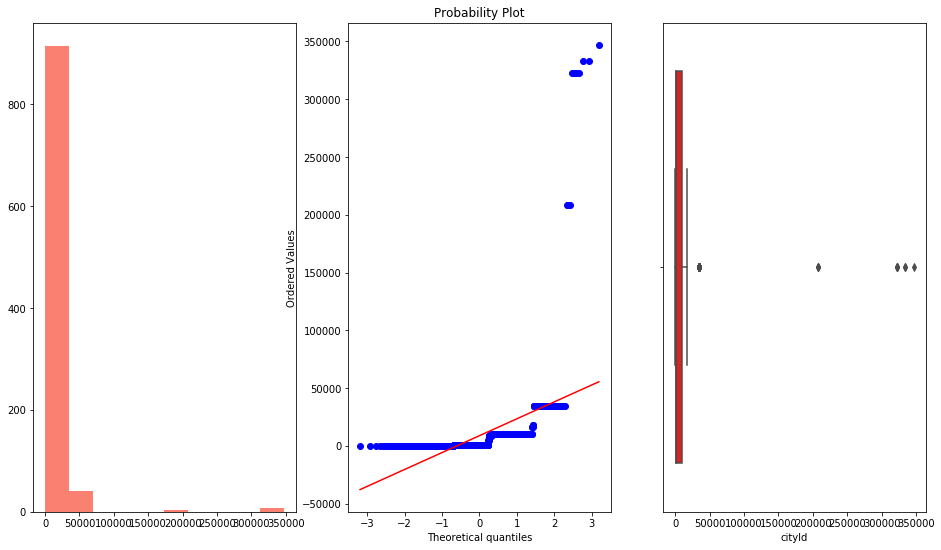

Feature stateId has Distribution of this kind


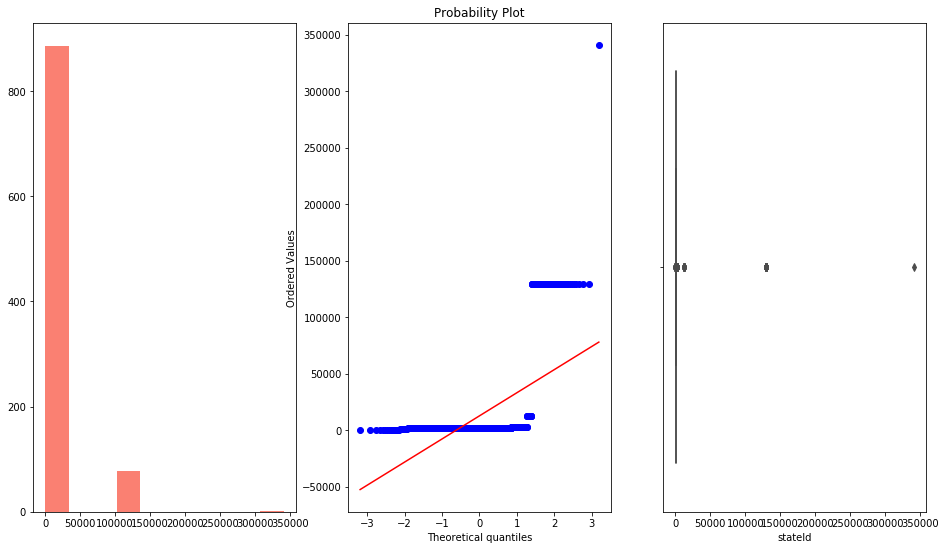

Feature countryDimId has Distribution of this kind


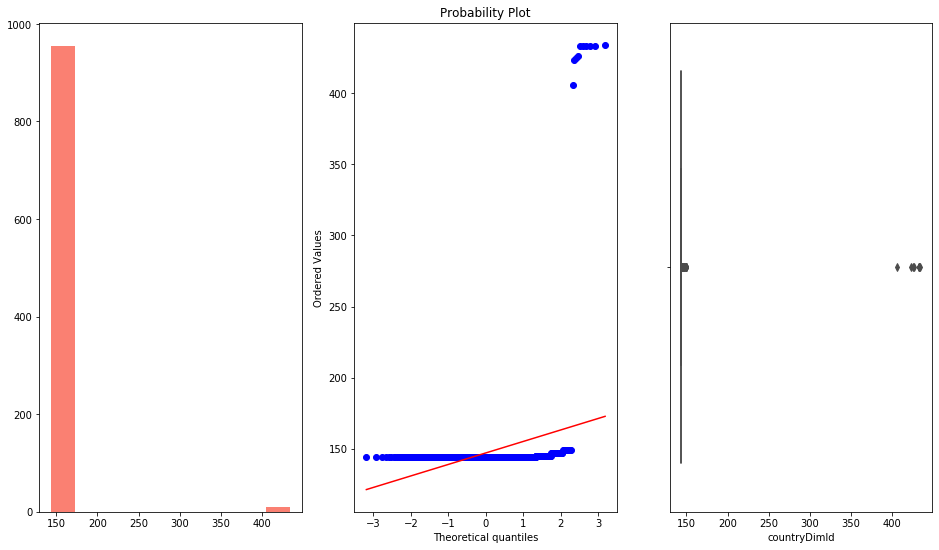

Feature browserId has Distribution of this kind


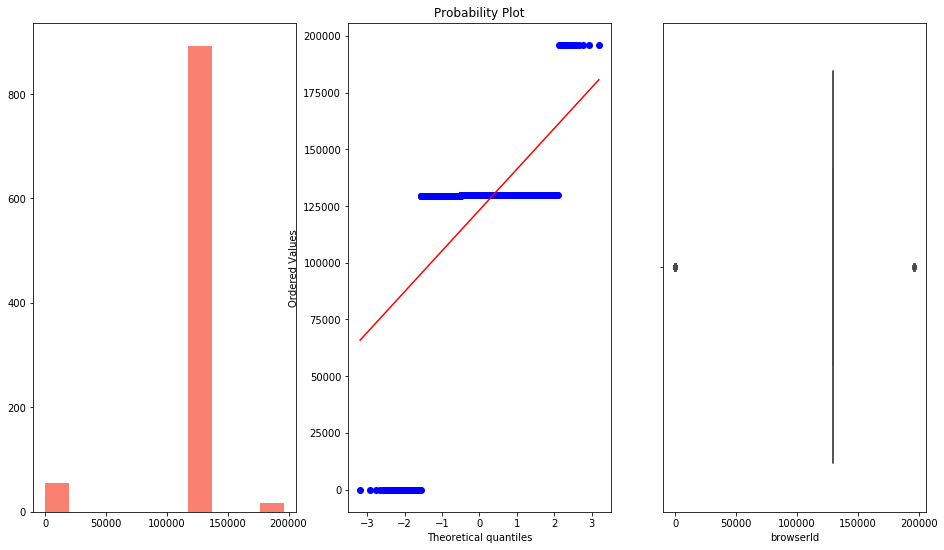

Feature adslotdimid has Distribution of this kind


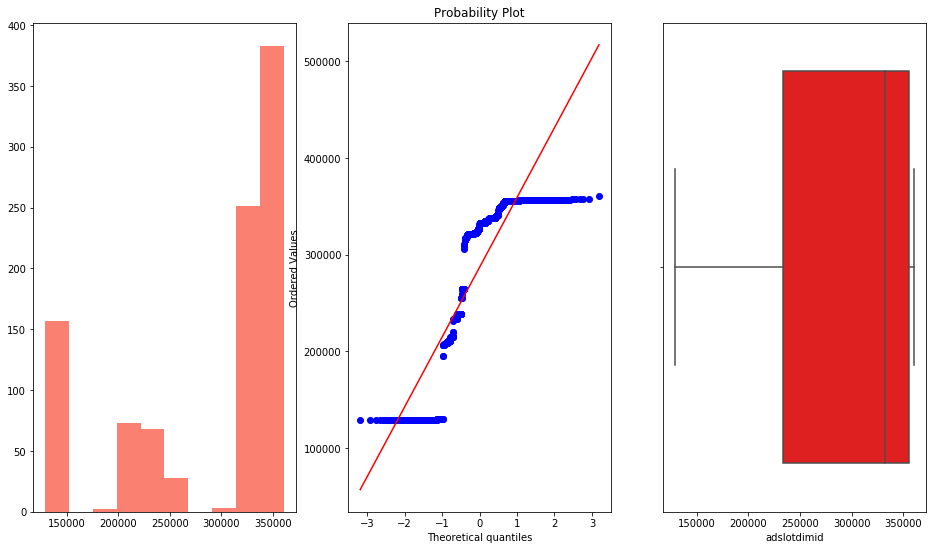

Feature ispDimId has Distribution of this kind


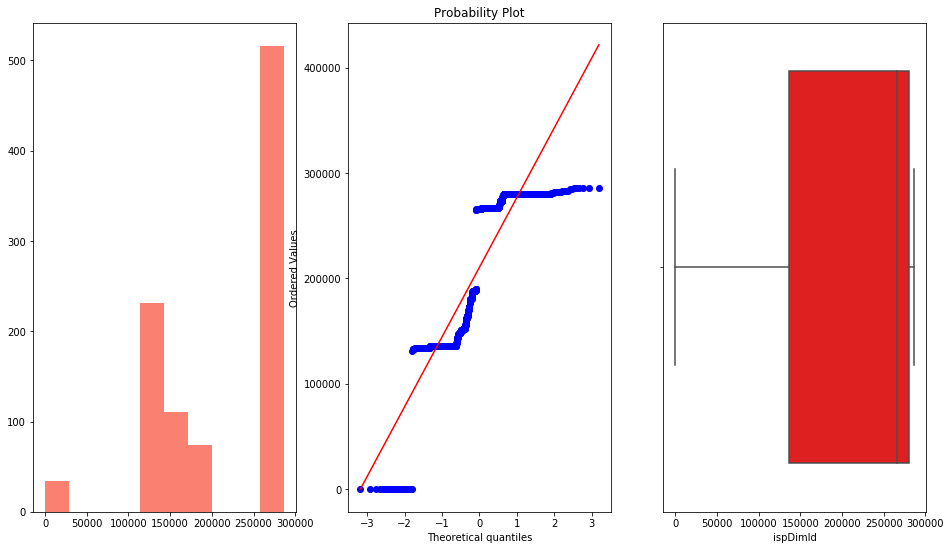

Feature osVerDimId has Distribution of this kind


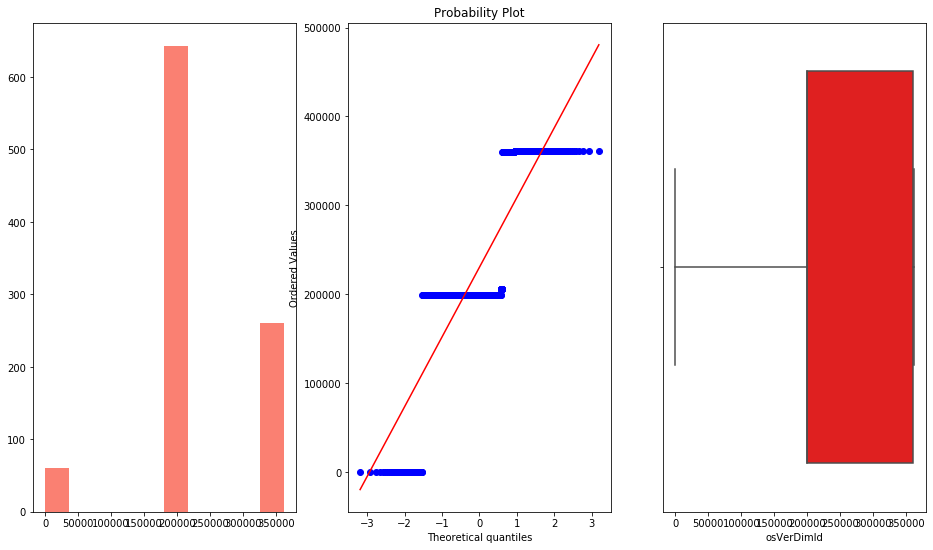

Feature clickIp has Distribution of this kind


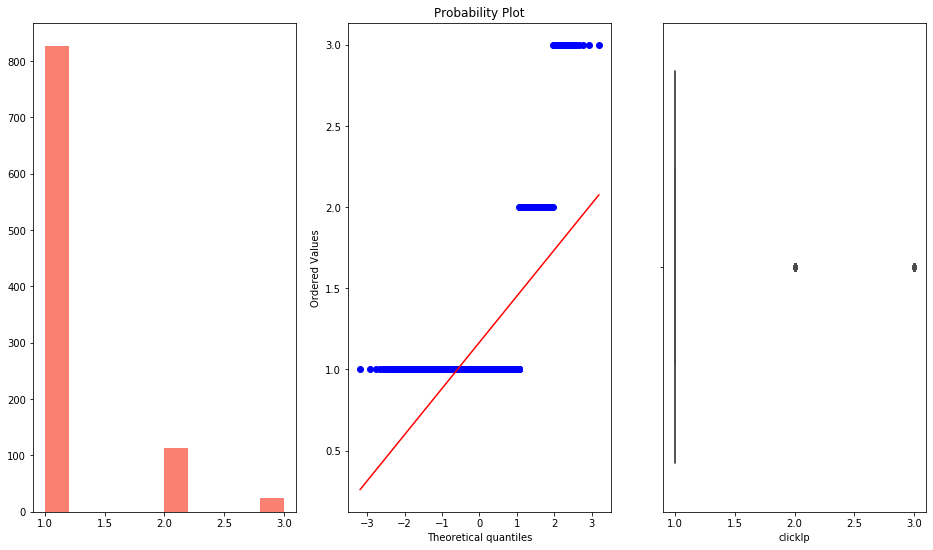

Feature crtd has Distribution of this kind


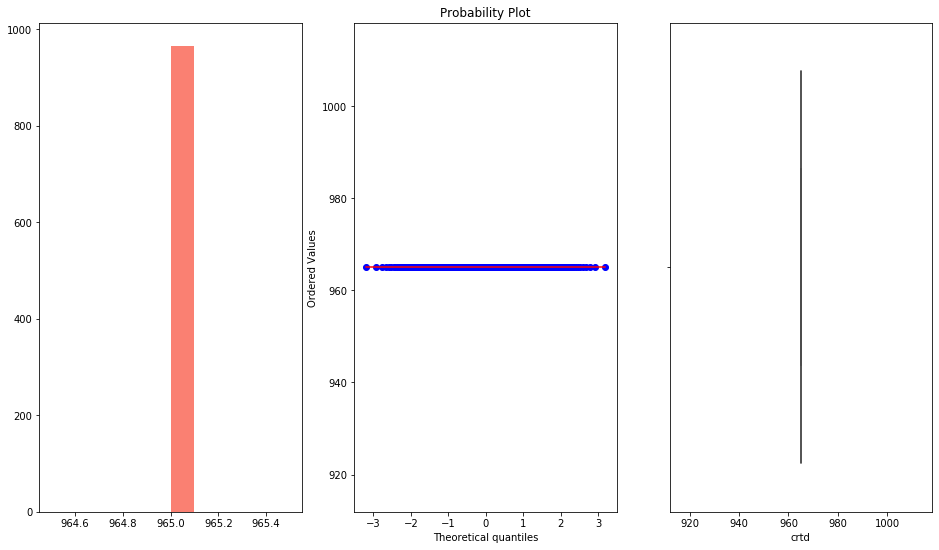

Feature itmClmbLId has Distribution of this kind


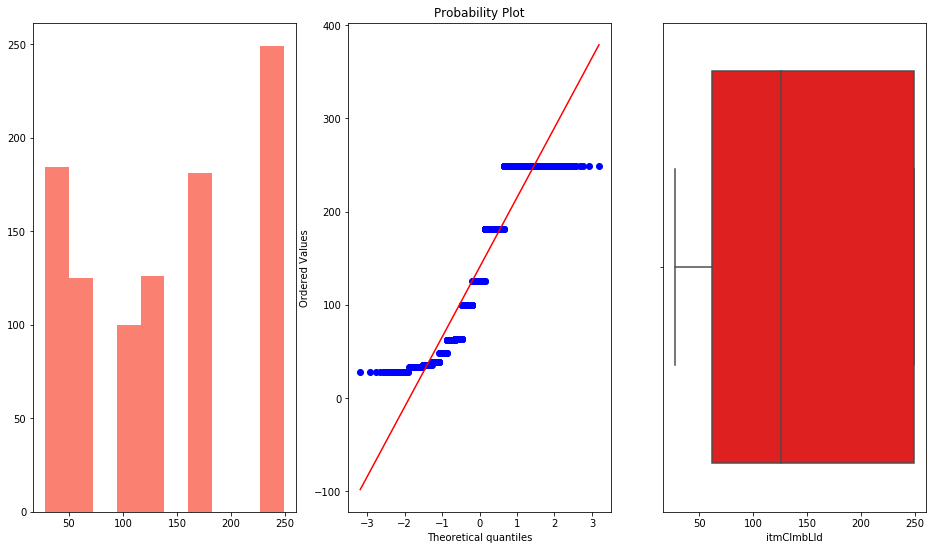

Feature devTypeDimId has Distribution of this kind


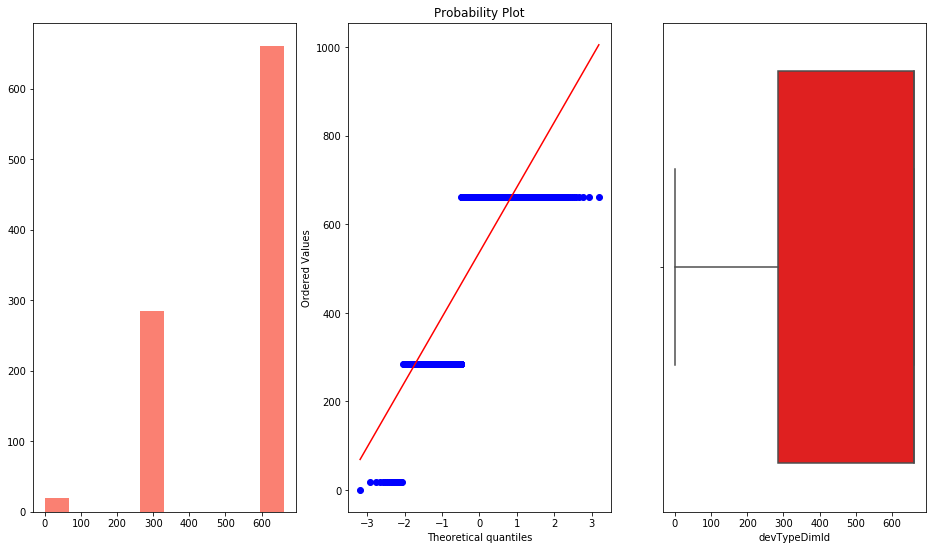

In [6]:
def drawplots(col):
  
  plt.figure(figsize = (16,9))
  plt.subplot(1,3,1)
  plt.hist(train[col],color = 'salmon')

  plt.subplot(1,3,2)
  stats.probplot(train[col],dist = 'norm',plot = plt)

  plt.subplot(1,3,3)
  sn.boxplot(train[col],color = 'red')

  plt.show()


for i in train.columns:
  print(f'Feature {i} has Distribution of this kind')
  drawplots(i)
  print("="*100)




In [13]:
def plotboxcox(df,col):
    
      plt.figure(figsize = (16,9))
      plt.subplot(1,3,1)
      plt.hist(df[col],color = 'salmon')

      plt.subplot(1,3,2)
      stats.probplot(df[col],dist = 'norm',plot = plt)

      plt.subplot(1,3,3)
      sn.boxplot(df[col],color = 'red')

      plt.show()

In [12]:
boxcox_list = ['clientid','pubclientid','siteId',
               'goalid','adslotdimid','ispDimId','itmClmbLId']

temp = train.copy()
for i in boxcox_list:
    temp[i],params = stats.boxcox(temp[i]+1)
    
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,163.405121,2.097882,0,0,4.591573,23373.89071,436.0,1806.0,144.0,129639.0,1.920772e+15,39356.048648,199452.0,2,965,19.555023,285
1,163.405121,4.723645,1,1,7.584343,23373.89071,10314.0,1817.0,144.0,129639.0,1.422446e+14,21625.519638,199452.0,1,965,23.677859,285
2,163.405121,2.097882,0,0,4.591573,23373.89071,0.0,1812.0,144.0,129639.0,1.925115e+15,26341.589306,199452.0,1,965,23.677859,285
3,163.405121,2.097882,0,0,4.591573,23373.89071,10300.0,1815.0,144.0,129639.0,1.920772e+15,21625.519638,199452.0,1,965,23.677859,285
4,63.342863,0.000000,3,0,14.932636,11101.28792,0.0,1818.0,144.0,129408.0,2.570195e+15,21625.519638,360833.0,1,965,23.677859,285


 Distribution for clientid is shown ↓


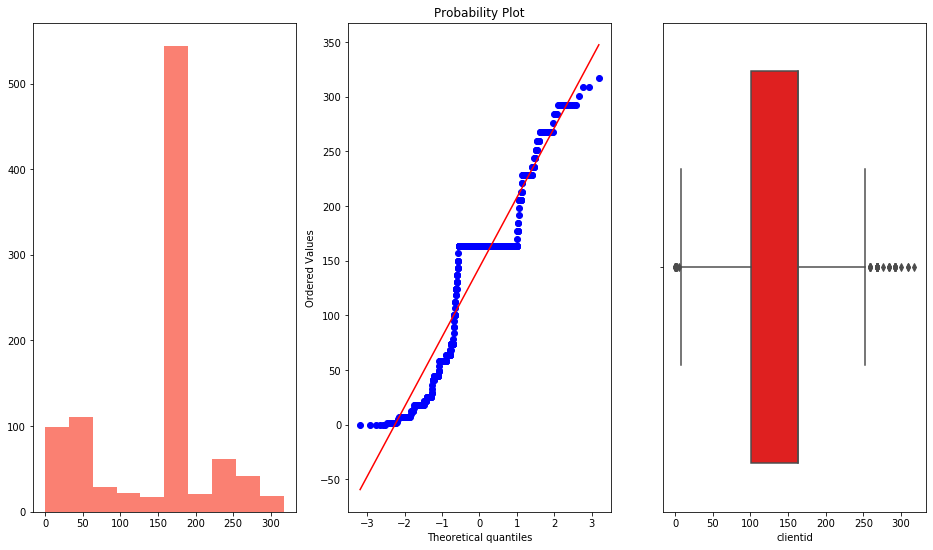

----------------------------------------------------------------------------------------------------
 Distribution for pubclientid is shown ↓


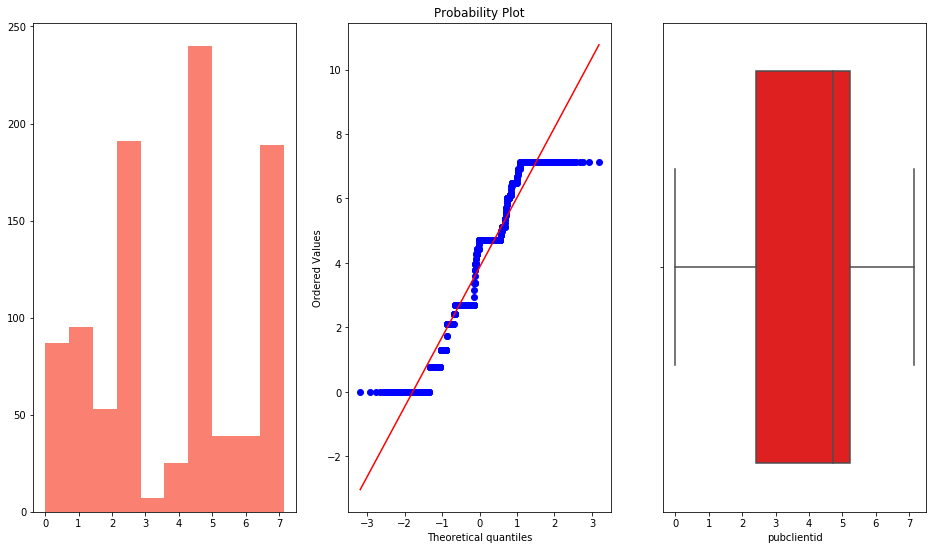

----------------------------------------------------------------------------------------------------
 Distribution for siteId is shown ↓


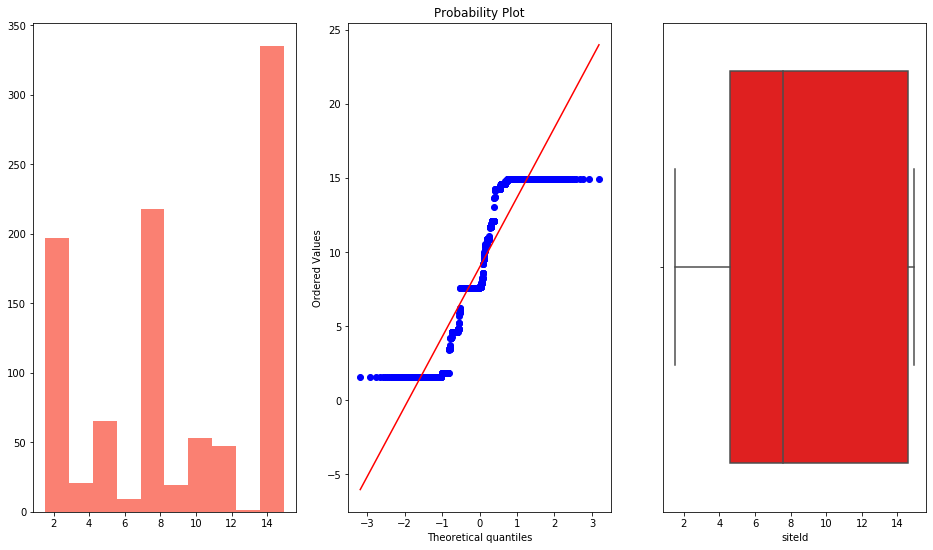

----------------------------------------------------------------------------------------------------
 Distribution for goalid is shown ↓


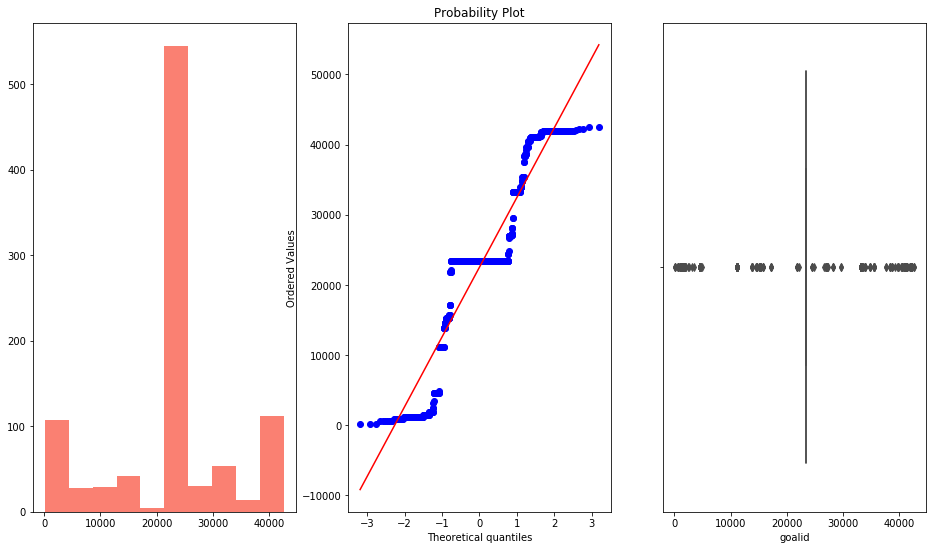

----------------------------------------------------------------------------------------------------
 Distribution for adslotdimid is shown ↓


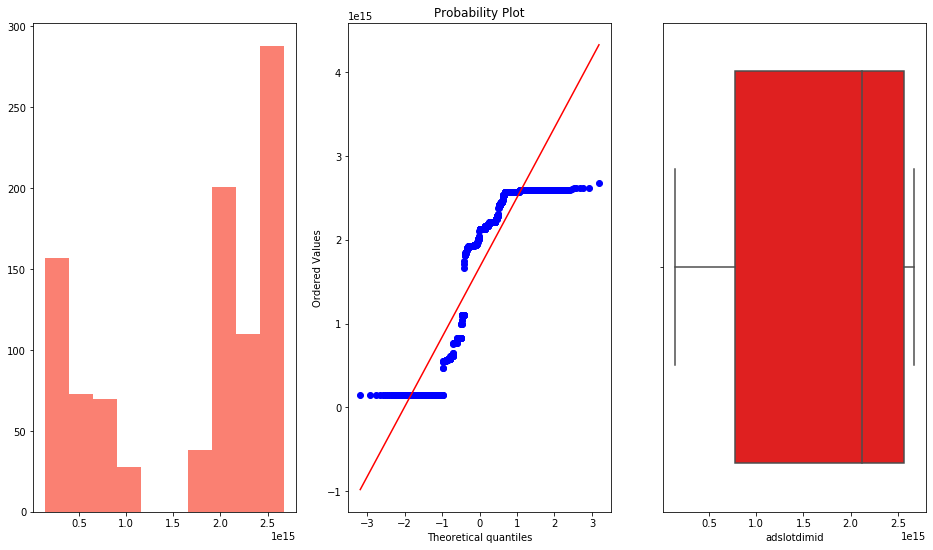

----------------------------------------------------------------------------------------------------
 Distribution for ispDimId is shown ↓


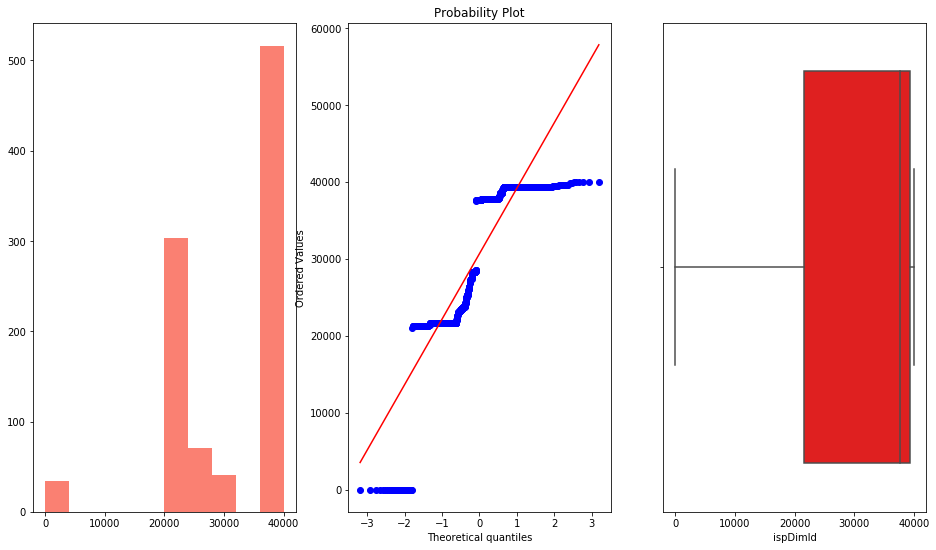

----------------------------------------------------------------------------------------------------
 Distribution for itmClmbLId is shown ↓


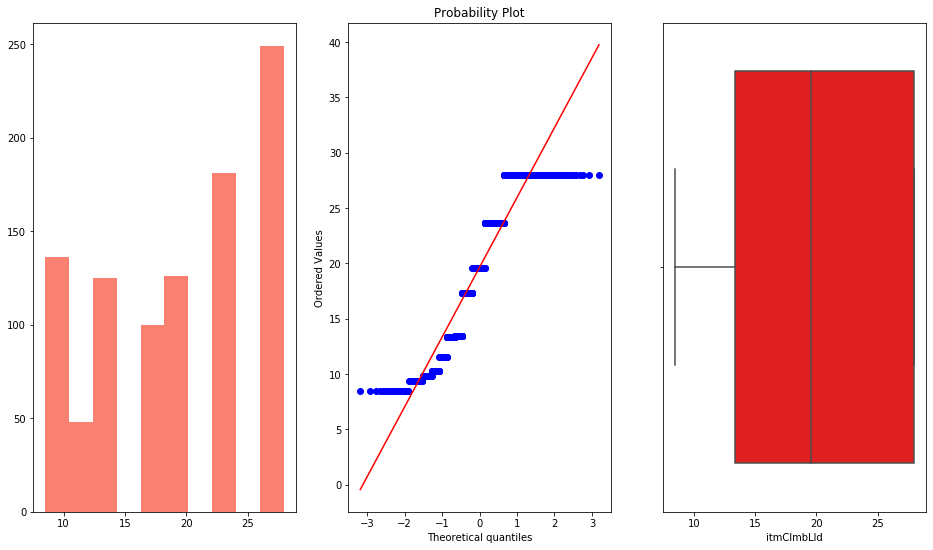

----------------------------------------------------------------------------------------------------


In [14]:
for i in boxcox_list:
    print(f' Distribution for {i} is shown ↓')
    plotboxcox(temp,i)
    print("-"*100)

In [19]:
log_list = ['clientid','pubclientid','siteId',
               'goalid','adslotdimid','ispDimId','itmClmbLId']

temp = train.copy()
for i in log_list:
    temp[i] = np.log(temp[i]+1)


In [20]:
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,3.610918,1.609438,0,0,3.555348,8.761707,436.0,1806.0,144.0,129639.0,12.680134,12.544079,199452.0,2,965,4.844187,285
1,3.610918,2.890372,1,1,5.187386,8.761707,10314.0,1817.0,144.0,129639.0,11.769426,11.821351,199452.0,1,965,5.204007,285
2,3.610918,1.609438,0,0,3.555348,8.761707,0.0,1812.0,144.0,129639.0,12.680924,12.059462,199452.0,1,965,5.204007,285
3,3.610918,1.609438,0,0,3.555348,8.761707,10300.0,1815.0,144.0,129639.0,12.680134,11.821351,199452.0,1,965,5.204007,285
4,2.995732,0.000000,3,0,8.100768,8.122965,0.0,1818.0,144.0,129408.0,12.782037,11.821351,360833.0,1,965,5.204007,285


 Distribution for clientid is shown ↓


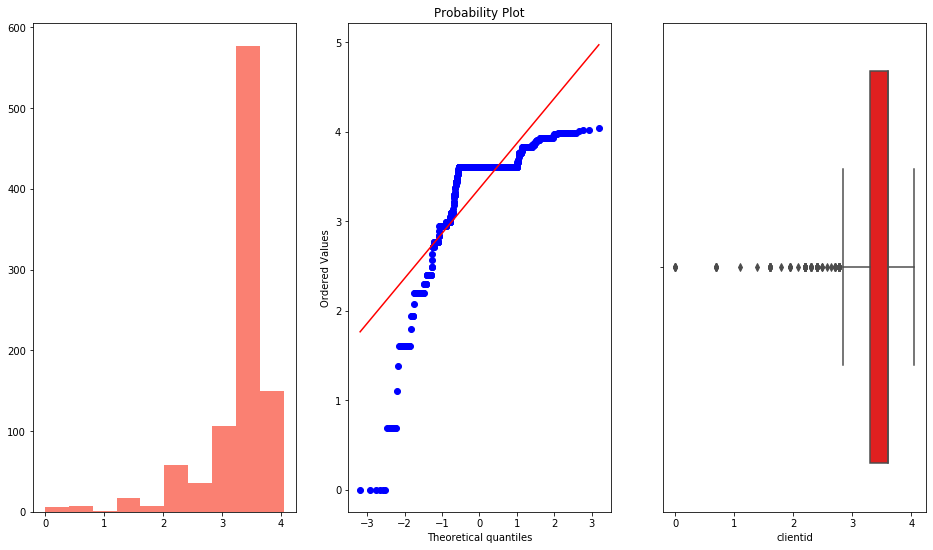

----------------------------------------------------------------------------------------------------
 Distribution for pubclientid is shown ↓


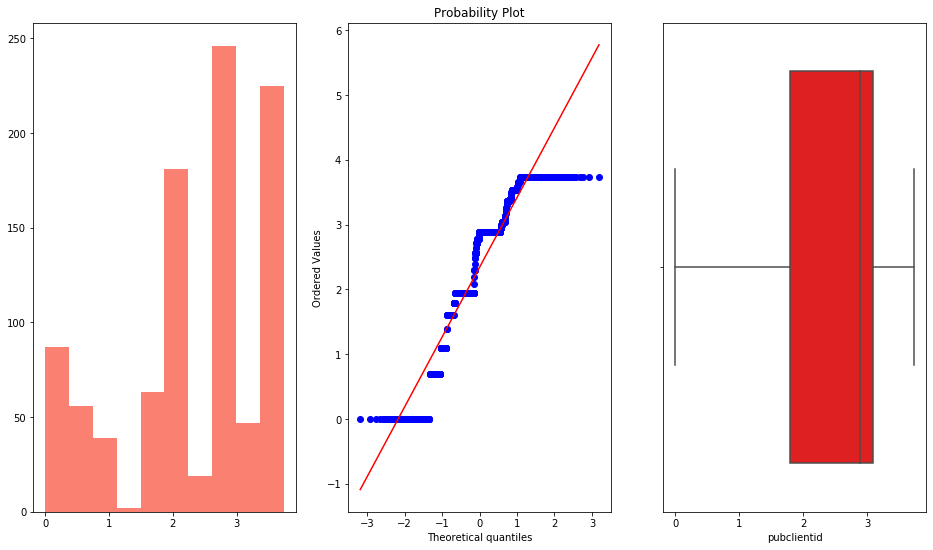

----------------------------------------------------------------------------------------------------
 Distribution for siteId is shown ↓


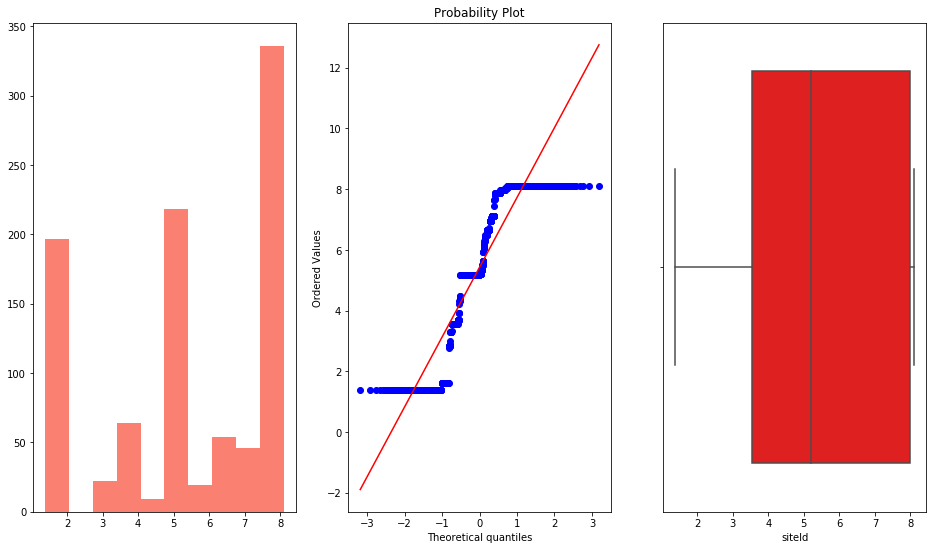

----------------------------------------------------------------------------------------------------
 Distribution for goalid is shown ↓


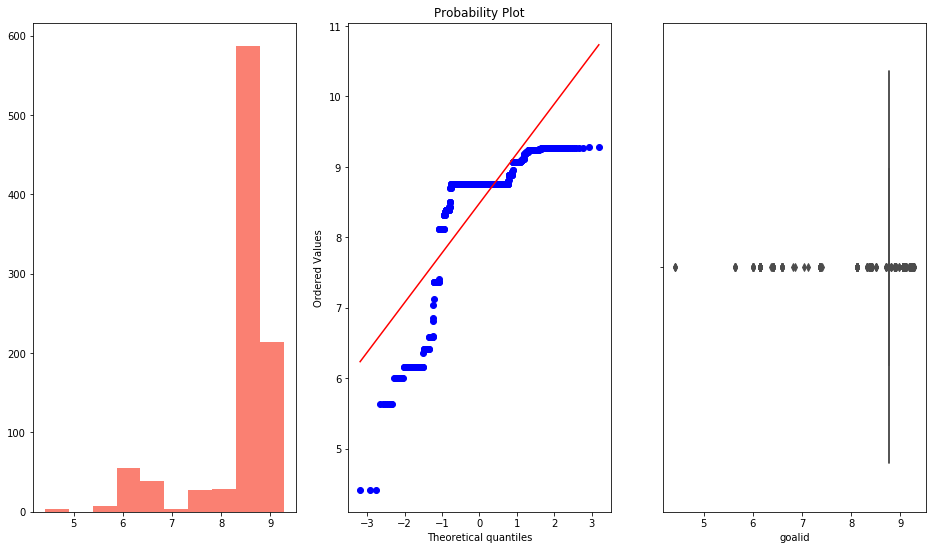

----------------------------------------------------------------------------------------------------
 Distribution for adslotdimid is shown ↓


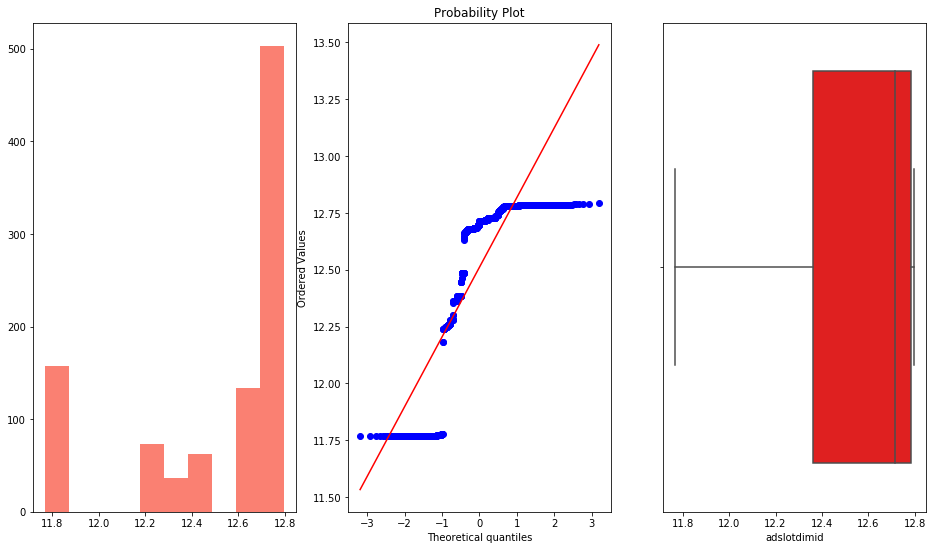

----------------------------------------------------------------------------------------------------
 Distribution for ispDimId is shown ↓


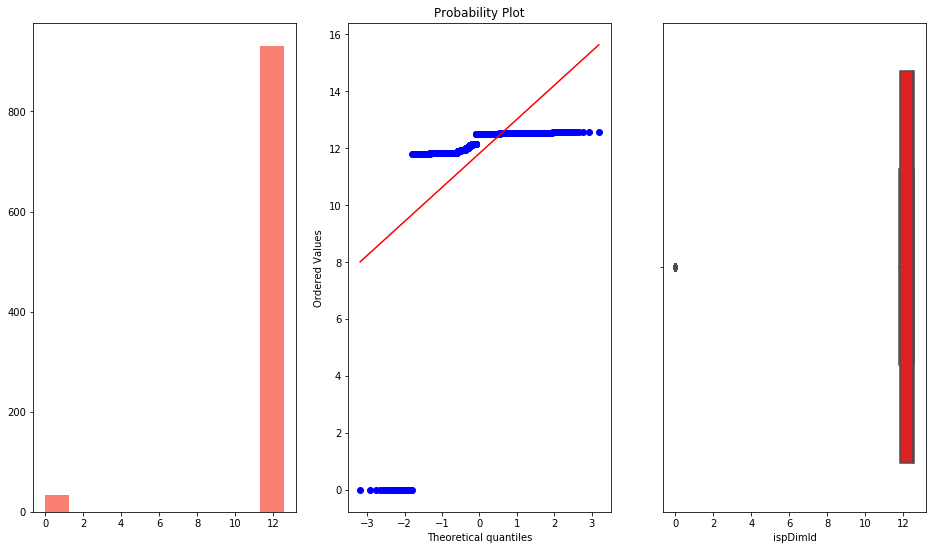

----------------------------------------------------------------------------------------------------
 Distribution for itmClmbLId is shown ↓


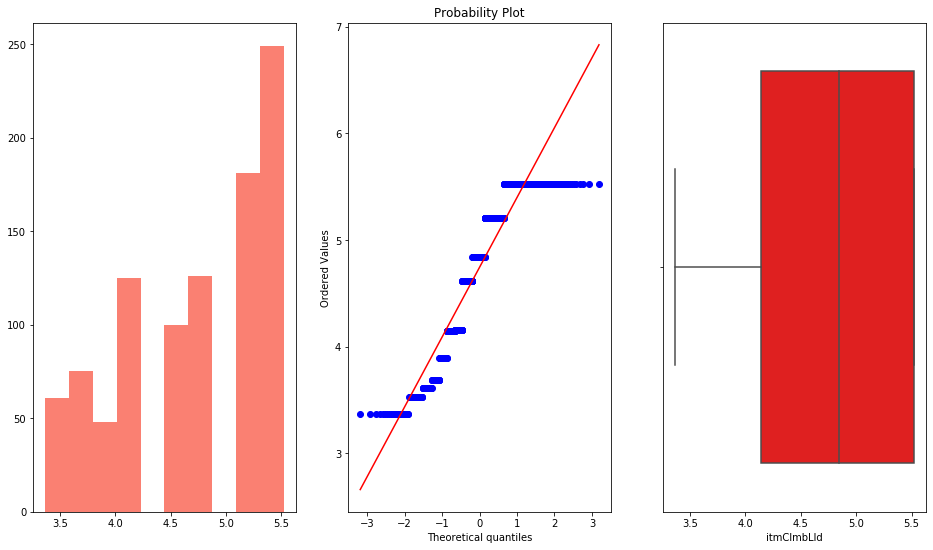

----------------------------------------------------------------------------------------------------


In [21]:
for i in log_list:
    print(f' Distribution for {i} is shown ↓')
    plotboxcox(temp,i)
    print("-"*100)

### Lets Go with Box-cox

In [22]:
boxcox_list = ['clientid','pubclientid','siteId',
               'goalid','adslotdimid','ispDimId','itmClmbLId']

temp = train.copy()
for i in boxcox_list:
    temp[i],params = stats.boxcox(temp[i]+1)
    
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,163.405121,2.097882,0,0,4.591573,23373.89071,436.0,1806.0,144.0,129639.0,1.920772e+15,39356.048648,199452.0,2,965,19.555023,285
1,163.405121,4.723645,1,1,7.584343,23373.89071,10314.0,1817.0,144.0,129639.0,1.422446e+14,21625.519638,199452.0,1,965,23.677859,285
2,163.405121,2.097882,0,0,4.591573,23373.89071,0.0,1812.0,144.0,129639.0,1.925115e+15,26341.589306,199452.0,1,965,23.677859,285
3,163.405121,2.097882,0,0,4.591573,23373.89071,10300.0,1815.0,144.0,129639.0,1.920772e+15,21625.519638,199452.0,1,965,23.677859,285
4,63.342863,0.000000,3,0,14.932636,11101.28792,0.0,1818.0,144.0,129408.0,2.570195e+15,21625.519638,360833.0,1,965,23.677859,285


In [23]:
# Removing outliers using IQR (Inter Quantile Range)

def quantile(df,val):
    a = []
    df_25 = df[val].quantile(0.25)
    df_75 = df[val].quantile(0.75)
    iqr = df_75-df_25
    upper_limit = float(df_75+(iqr*1.5))
    lower_limit = float(df_25-(iqr*1.5))
    
    for i in df[val]:
        if i>upper_limit:
            i = np.NaN
        
        elif i<lower_limit:
            i = np.NaN
            
        else:
            i = i
            
        a.append(i)
        
    return a

outlier_removal = ['clientid','pubclientid','siteId',
               'goalid','adslotdimid','ispDimId','itmClmbLId']

for i in outlier_removal:
    temp[i] = quantile(temp,i)
    

In [24]:
temp.isnull().sum()

clientid         75
pubclientid       0
clmbuserid        0
imprid            0
siteId            0
goalid          429
cityId            0
stateId           0
countryDimId      0
browserId         0
adslotdimid       0
ispDimId          0
osVerDimId        0
clickIp           0
crtd              0
itmClmbLId        0
devTypeDimId      0
dtype: int64

### After Outlier Removal


**Cols clientid,goalid need to be transformed!**

 Distribution for clientid is shown ↓


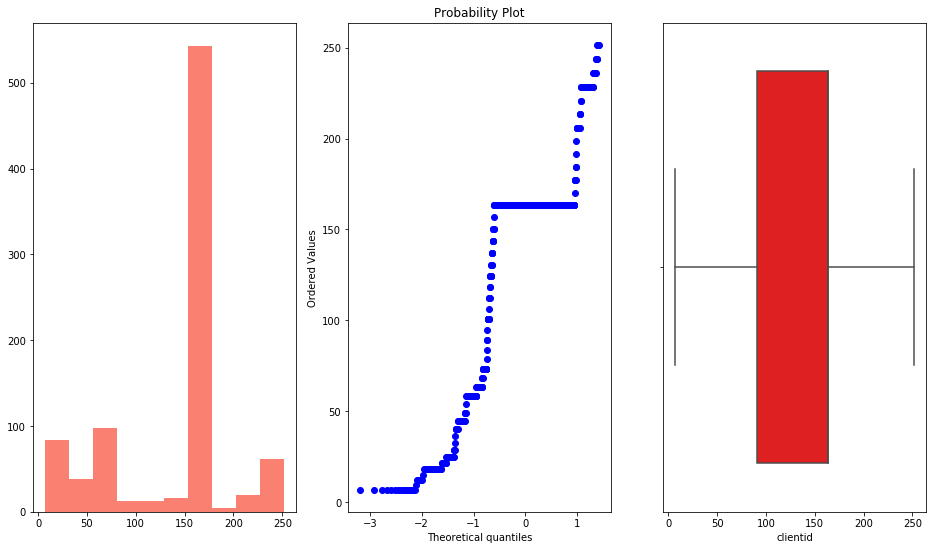

----------------------------------------------------------------------------------------------------
 Distribution for pubclientid is shown ↓


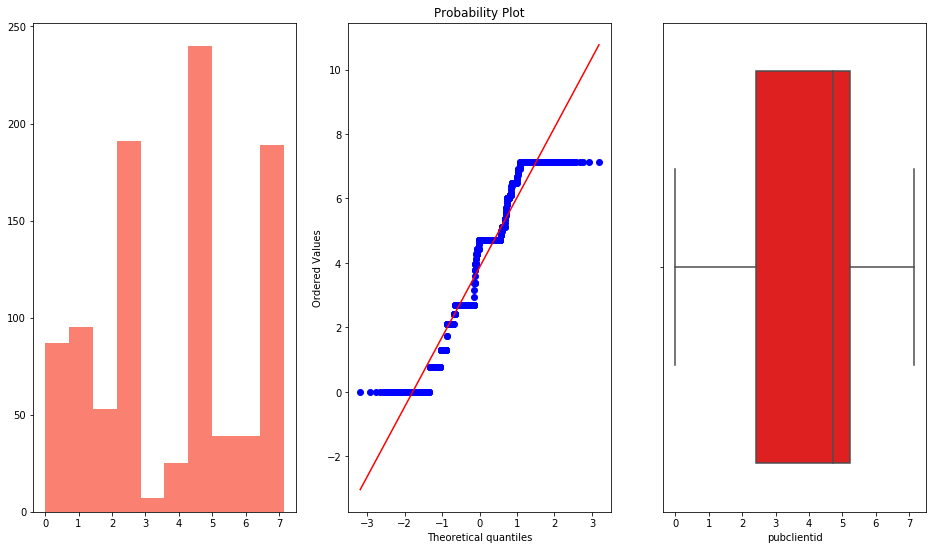

----------------------------------------------------------------------------------------------------
 Distribution for siteId is shown ↓


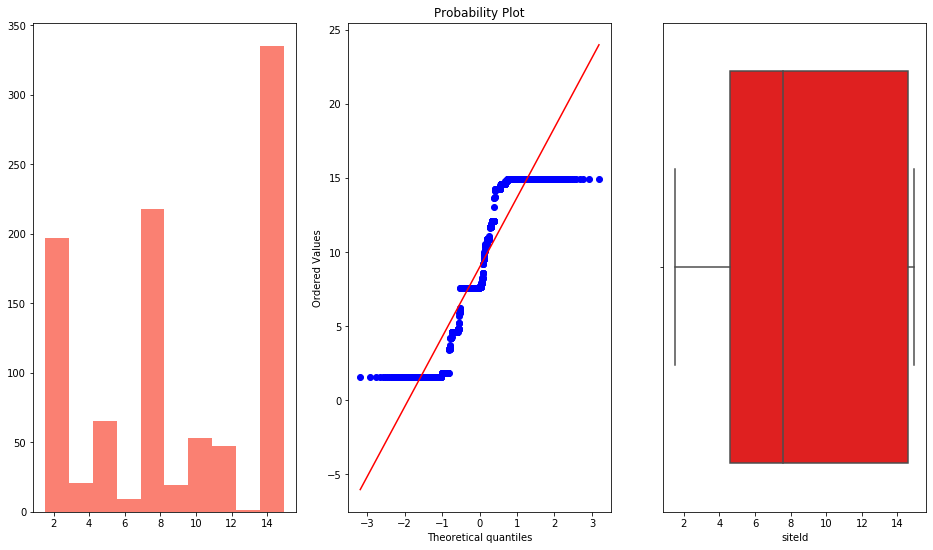

----------------------------------------------------------------------------------------------------
 Distribution for goalid is shown ↓


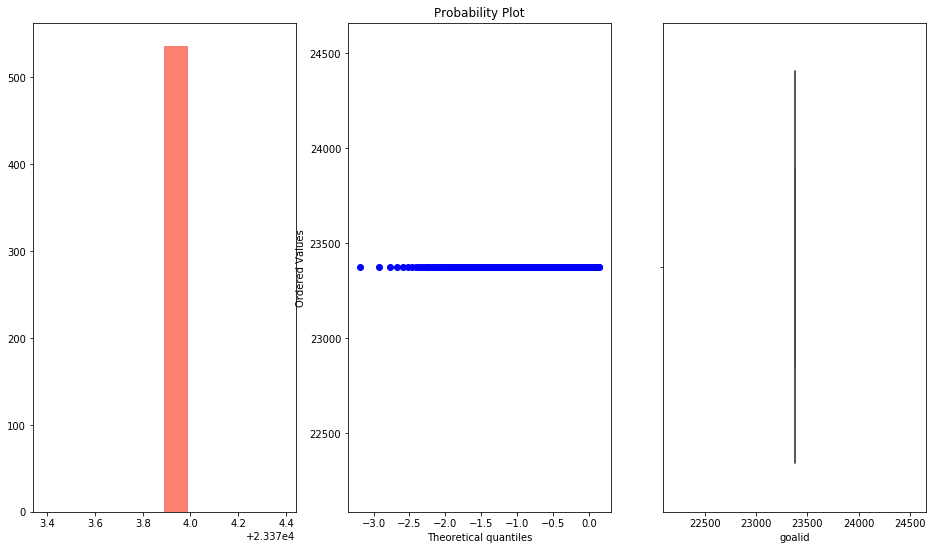

----------------------------------------------------------------------------------------------------
 Distribution for adslotdimid is shown ↓


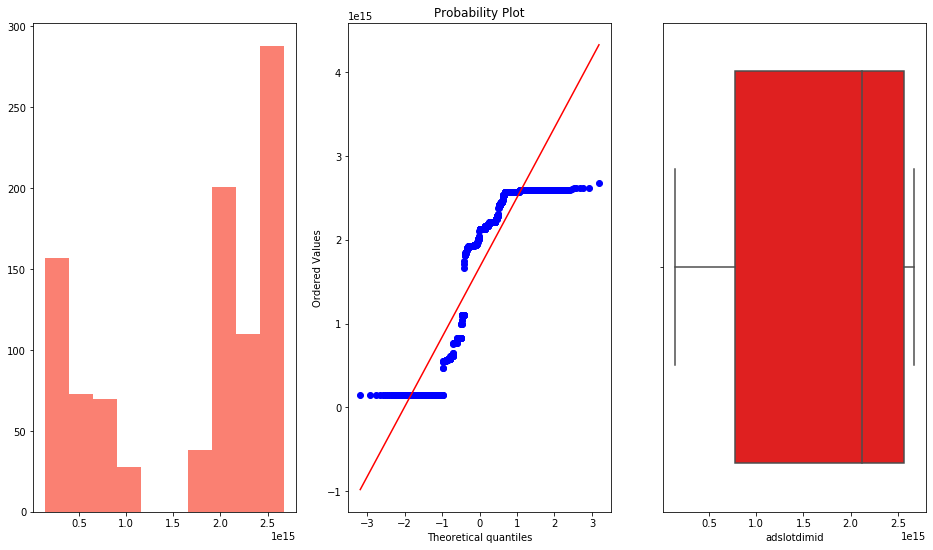

----------------------------------------------------------------------------------------------------
 Distribution for ispDimId is shown ↓


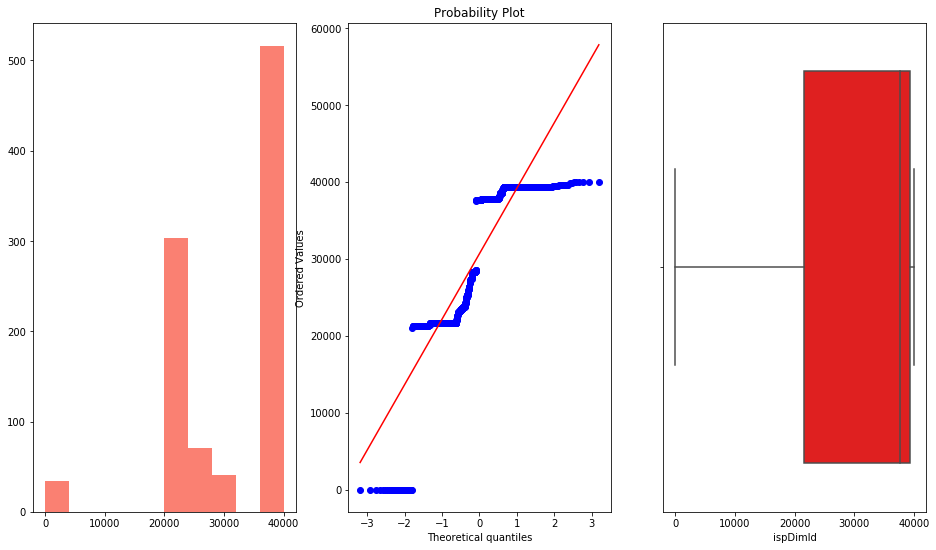

----------------------------------------------------------------------------------------------------
 Distribution for itmClmbLId is shown ↓


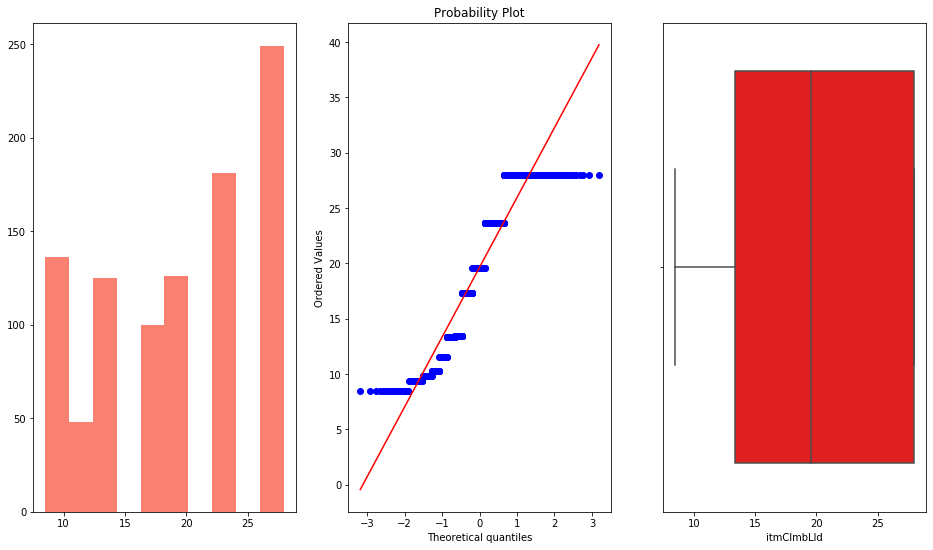

----------------------------------------------------------------------------------------------------


In [25]:
for i in boxcox_list:
    print(f' Distribution for {i} is shown ↓')
    plotboxcox(temp,i)
    print("-"*100)

In [31]:
def fillnavalues(colname):
    temp[colname+'_mean'] = temp[colname].fillna(temp[colname].mean())
    temp[colname+'_median'] = temp[colname].fillna(temp[colname].median())
    temp[colname+'_mode'] = temp[colname].fillna(temp[colname].mode()[0])

In [35]:
def maps(df,col):
    
    plt.figure(figsize=(20,7))
    plt.subplot(1,3,1)
    sn.distplot(df[col],kde=True,hist=False,color='red',label=col)
    sn.distplot(df[col+'_mean'],kde=True,hist=False,color='black',label=col+'_mean')
    
    plt.subplot(1,3,2)
    sn.distplot(df[col],kde=True,hist=False,color='red',label=col)
    sn.distplot(df[col+'_median'],kde=True,hist=False,color='black',label=col+'_median')
    
    plt.subplot(1,3,3)
    sn.distplot(df[col],kde=True,hist=False,color='red',label=col)
    sn.distplot(df[col+'_mode'],kde=True,hist=False,color='black',label=col+'_mode')
    
    plt.show()
    

 
col_list = ['clientid','goalid']
for i in col_list:
    fillnavalues(i)

In [36]:
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,...,clickIp,crtd,itmClmbLId,devTypeDimId,clientid_mean,clientid_median,clientid_mode,goalid_mean,goalid_median,goalid_mode
0,163.405121,2.097882,0,0,4.591573,23373.89071,436.0,1806.0,144.0,129639.0,...,2,965,19.555023,285,163.405121,163.405121,163.405121,23373.89071,23373.89071,23373.89071
1,163.405121,4.723645,1,1,7.584343,23373.89071,10314.0,1817.0,144.0,129639.0,...,1,965,23.677859,285,163.405121,163.405121,163.405121,23373.89071,23373.89071,23373.89071
2,163.405121,2.097882,0,0,4.591573,23373.89071,0.0,1812.0,144.0,129639.0,...,1,965,23.677859,285,163.405121,163.405121,163.405121,23373.89071,23373.89071,23373.89071
3,163.405121,2.097882,0,0,4.591573,23373.89071,10300.0,1815.0,144.0,129639.0,...,1,965,23.677859,285,163.405121,163.405121,163.405121,23373.89071,23373.89071,23373.89071
4,63.342863,0.000000,3,0,14.932636,NaN,0.0,1818.0,144.0,129408.0,...,1,965,23.677859,285,63.342863,63.342863,63.342863,23373.89071,23373.89071,23373.89071


 Distribution analysis for col : clientid is shown ↓


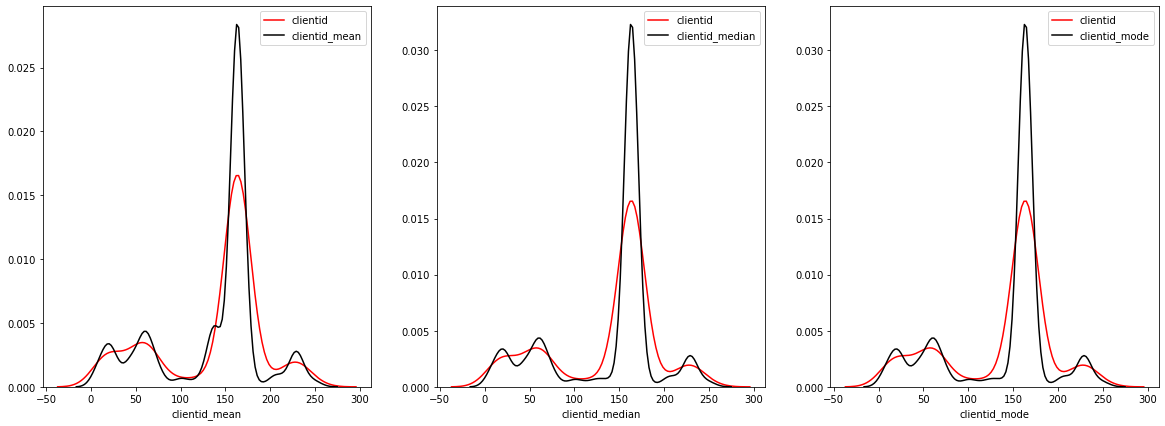

 Distribution analysis for col : goalid is shown ↓


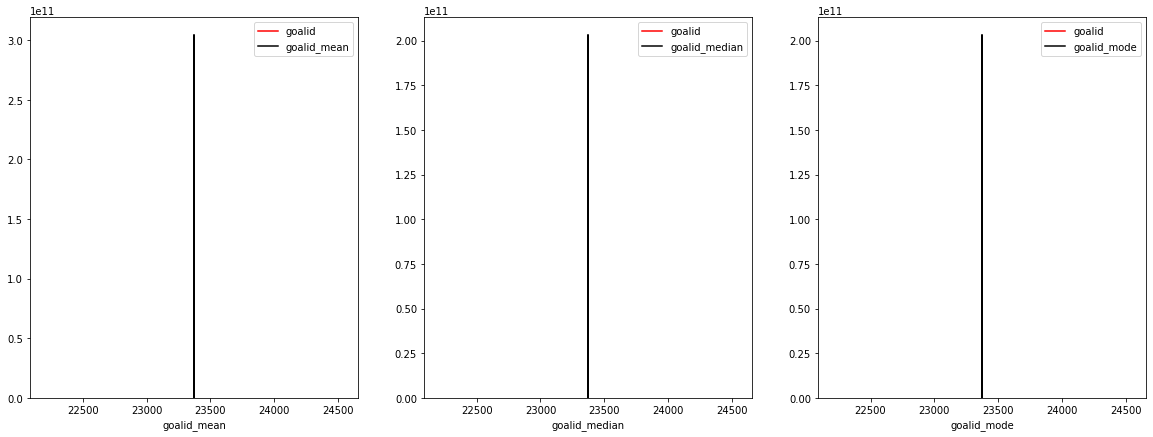

In [37]:
for i in col_list:
    print(f' Distribution analysis for col : {i} is shown ↓')
    maps(temp,i)
    print("="*100)
    
    

In [38]:
# Filling in maxi-mini

def fillmaxi(col):
    
    maximin = max(temp[col])-min(temp[col])
    temp[col] = temp[col].fillna(maximin)
    

col_list = ['clientid','goalid']
for i in col_list:
    fillmaxi(i)   

 Distribution analysis for col : clientid is shown ↓


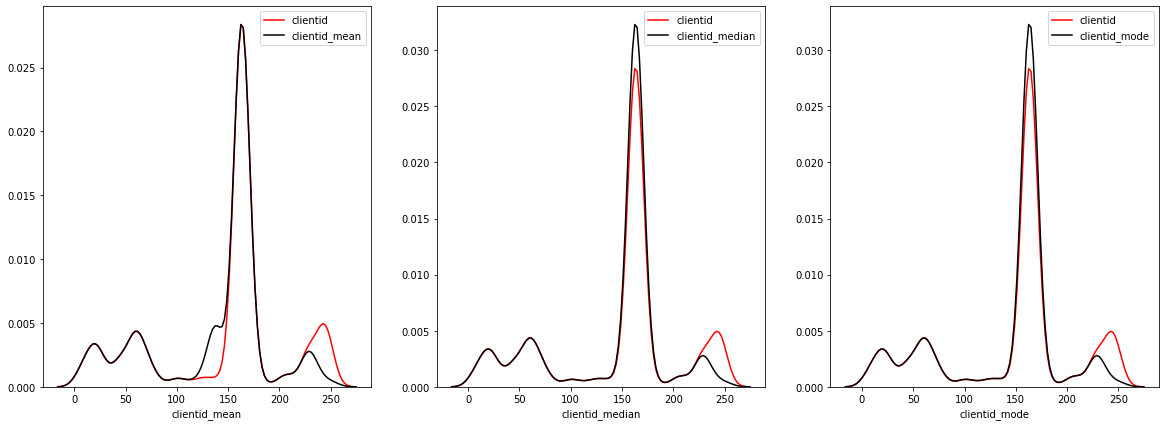

 Distribution analysis for col : goalid is shown ↓


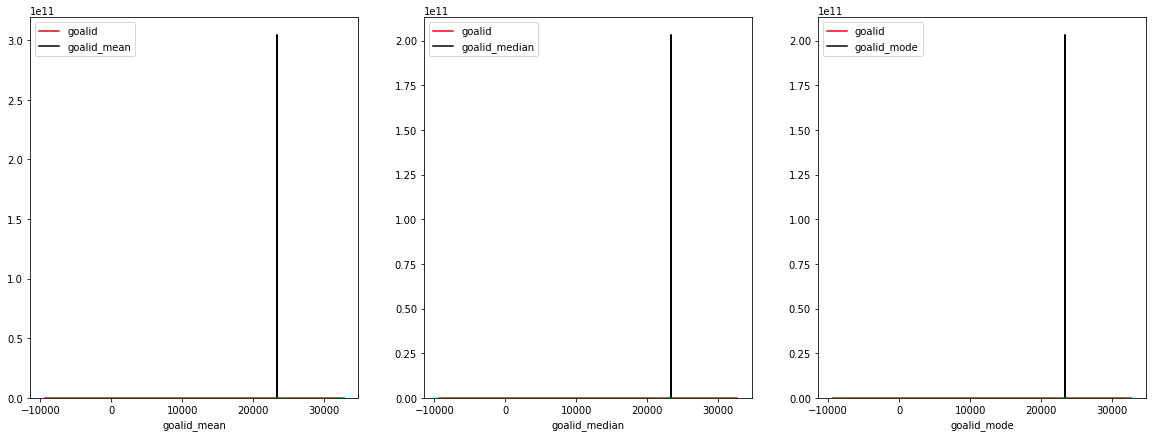

In [39]:
for i in col_list:
    print(f' Distribution analysis for col : {i} is shown ↓')
    maps(temp,i)
    print("="*100)
    
    

**Filling the missing values with the minimaxi worked the best!**

In [40]:
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,...,clickIp,crtd,itmClmbLId,devTypeDimId,clientid_mean,clientid_median,clientid_mode,goalid_mean,goalid_median,goalid_mode
0,163.405121,2.097882,0,0,4.591573,23373.89071,436.0,1806.0,144.0,129639.0,...,2,965,19.555023,285,163.405121,163.405121,163.405121,23373.89071,23373.89071,23373.89071
1,163.405121,4.723645,1,1,7.584343,23373.89071,10314.0,1817.0,144.0,129639.0,...,1,965,23.677859,285,163.405121,163.405121,163.405121,23373.89071,23373.89071,23373.89071
2,163.405121,2.097882,0,0,4.591573,23373.89071,0.0,1812.0,144.0,129639.0,...,1,965,23.677859,285,163.405121,163.405121,163.405121,23373.89071,23373.89071,23373.89071
3,163.405121,2.097882,0,0,4.591573,23373.89071,10300.0,1815.0,144.0,129639.0,...,1,965,23.677859,285,163.405121,163.405121,163.405121,23373.89071,23373.89071,23373.89071
4,63.342863,0.000000,3,0,14.932636,0.00000,0.0,1818.0,144.0,129408.0,...,1,965,23.677859,285,63.342863,63.342863,63.342863,23373.89071,23373.89071,23373.89071


In [41]:
temp.isnull().sum()

clientid           0
pubclientid        0
clmbuserid         0
imprid             0
siteId             0
goalid             0
cityId             0
stateId            0
countryDimId       0
browserId          0
adslotdimid        0
ispDimId           0
osVerDimId         0
clickIp            0
crtd               0
itmClmbLId         0
devTypeDimId       0
clientid_mean      0
clientid_median    0
clientid_mode      0
goalid_mean        0
goalid_median      0
goalid_mode        0
dtype: int64

In [43]:
temp = temp[['clientid', 'pubclientid', 'clmbuserid', 'imprid', 'siteId', 'goalid',
       'cityId', 'stateId', 'countryDimId', 'browserId', 'adslotdimid',
       'ispDimId', 'osVerDimId', 'clickIp', 'crtd', 'itmClmbLId',
       'devTypeDimId']]
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,163.405121,2.097882,0,0,4.591573,23373.89071,436.0,1806.0,144.0,129639.0,1.920772e+15,39356.048648,199452.0,2,965,19.555023,285
1,163.405121,4.723645,1,1,7.584343,23373.89071,10314.0,1817.0,144.0,129639.0,1.422446e+14,21625.519638,199452.0,1,965,23.677859,285
2,163.405121,2.097882,0,0,4.591573,23373.89071,0.0,1812.0,144.0,129639.0,1.925115e+15,26341.589306,199452.0,1,965,23.677859,285
3,163.405121,2.097882,0,0,4.591573,23373.89071,10300.0,1815.0,144.0,129639.0,1.920772e+15,21625.519638,199452.0,1,965,23.677859,285
4,63.342863,0.000000,3,0,14.932636,0.00000,0.0,1818.0,144.0,129408.0,2.570195e+15,21625.519638,360833.0,1,965,23.677859,285


In [81]:
temp.shape,train.shape

((965, 17), (965, 17))

### Feature Selection

In [44]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier

In [55]:
mutual_info = mutual_info_classif(temp,test)
data = pd.DataFrame(mutual_info,index=temp.columns)
data.columns = ['Mutual_info']
data.sort_values(by = ['Mutual_info'],ascending = False).head(10).style.background_gradient('plasma')

,Mutual_info
itmClmbLId,0.173053
adslotdimid,0.163075
siteId,0.134303
devTypeDimId,0.126031
pubclientid,0.117343
stateId,0.055996
clmbuserid,0.053735
clientid,0.034162
imprid,0.032795
ispDimId,0.025812


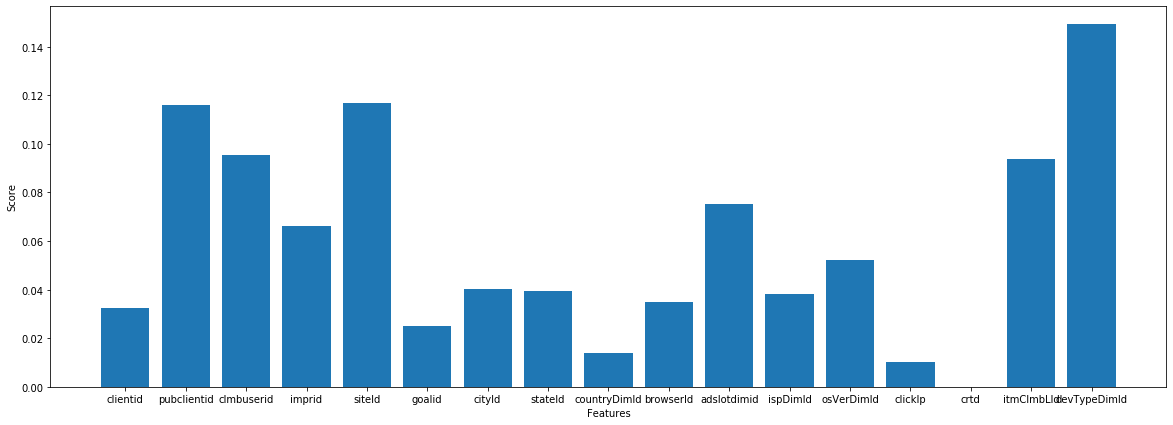

In [66]:
extratree = ExtraTreesClassifier()
extratree.fit(temp,test)
datadum = pd.DataFrame(extratree.feature_importances_,index = temp.columns,columns=['Important'])
datadum.sort_values(['Important'],ascending = False)
plt.figure(figsize=(20,7))
plt.bar(temp.columns,datadum['Important'],align='center')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()


In [93]:
top10mut = data.sort_values(by = ['Mutual_info'],ascending=False)
top10tree = datadum.sort_values(by = ['Important'],ascending=False)

In [94]:
top10 = top10mut.index[:10]
top10tree = top10tree.index[:10]
top10

Index(['itmClmbLId', 'adslotdimid', 'siteId', 'devTypeDimId', 'pubclientid',
       'stateId', 'clmbuserid', 'clientid', 'imprid', 'ispDimId'],
      dtype='object')

In [99]:
top10 = list(top10)
top10tree = list(top10tree)
touse = list(set(top10+top10tree))
print(touse)

['adslotdimid',
 'imprid',
 'clmbuserid',
 'pubclientid',
 'ispDimId',
 'itmClmbLId',
 'devTypeDimId',
 'siteId',
 'stateId',
 'osVerDimId',
 'clientid',
 'cityId']

In [100]:
colstouse = []
for i in temp.columns:
    if i in touse:
        colstouse.append(i)
        
print(colstouse)

['clientid', 'pubclientid', 'clmbuserid', 'imprid', 'siteId', 'cityId', 'stateId', 'adslotdimid', 'ispDimId', 'osVerDimId', 'itmClmbLId', 'devTypeDimId']


In [101]:
temp = temp[['clientid', 'pubclientid', 'clmbuserid', 
             'imprid', 'siteId', 'cityId', 'stateId', 
             'adslotdimid', 'ispDimId', 'osVerDimId', 
             'itmClmbLId', 'devTypeDimId']
]
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,cityId,stateId,adslotdimid,ispDimId,osVerDimId,itmClmbLId,devTypeDimId
0,163.405121,2.097882,0,0,4.591573,436.0,1806.0,1.920772e+15,39356.048648,199452.0,19.555023,285
1,163.405121,4.723645,1,1,7.584343,10314.0,1817.0,1.422446e+14,21625.519638,199452.0,23.677859,285
2,163.405121,2.097882,0,0,4.591573,0.0,1812.0,1.925115e+15,26341.589306,199452.0,23.677859,285
3,163.405121,2.097882,0,0,4.591573,10300.0,1815.0,1.920772e+15,21625.519638,199452.0,23.677859,285
4,63.342863,0.000000,3,0,14.932636,0.0,1818.0,2.570195e+15,21625.519638,360833.0,23.677859,285


In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import metrics

In [103]:
X_train, X_test, y_train, y_test =  train_test_split(temp,test,test_size=0.4)
print(X_train.shape,X_test.shape)

(579, 12) (386, 12)


In [104]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.        , 0.00092113, 0.00149683, 0.00153521, 0.00161197,
       0.00224525, 0.00230282, 0.00288127, 0.00308414, 0.00310984,
       0.00323138, 0.00367332, 0.00496351, 0.00746162, 0.0175737 ,
       0.02605377, 0.02892268, 0.0560176 ])

In [105]:
alpha_list = []
for i in ccp_alpha:
    clf = DecisionTreeClassifier(ccp_alpha=i)
    clf.fit(X_train,y_train)
    alpha_list.append(clf)

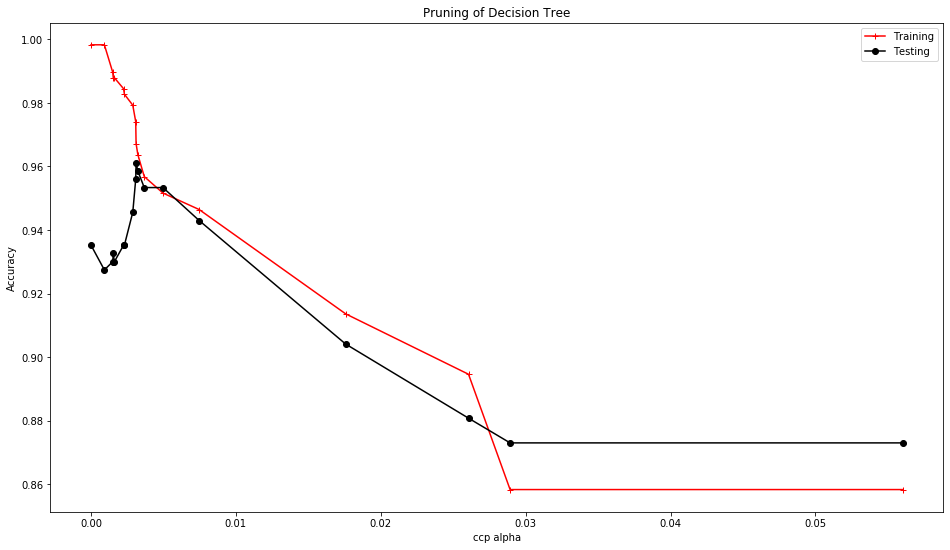

In [107]:
train_score = [clf.score(X_train,y_train) for clf in alpha_list]
test_score = [clf.score(X_test,y_test) for clf in alpha_list]
plt.figure(figsize = (16,9))
plt.plot(ccp_alpha,train_score,marker = '+',color = 'red',label = 'Training')
plt.plot(ccp_alpha,test_score,marker = 'o',color = 'black',label = 'Testing')
plt.title('Pruning of Decision Tree')
plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


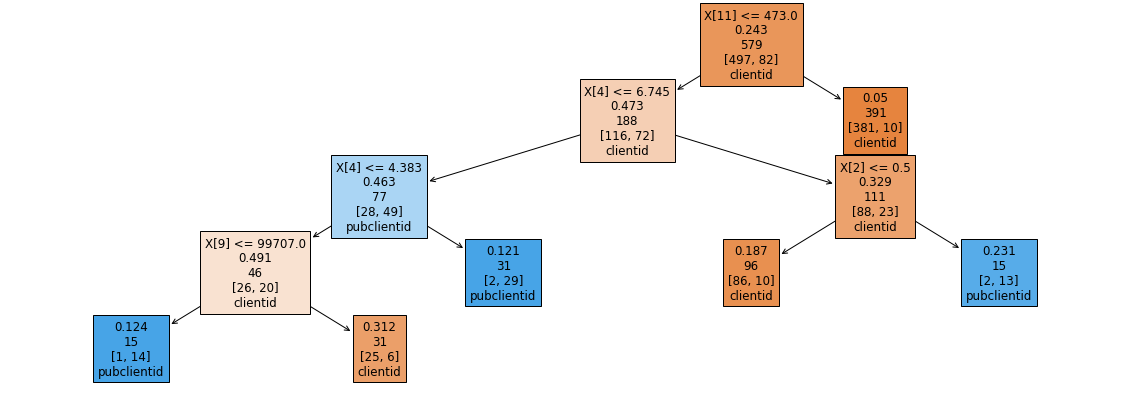

In [115]:
clf = DecisionTreeClassifier(ccp_alpha=0.015)
clf.fit(X_train,y_train)
plt.figure(figsize=(20,7))
labels = ['YES','NO']
tree.plot_tree(clf,filled=True,label=labels,class_names=temp.columns)
plt.show()

In [116]:
clf = DecisionTreeClassifier(ccp_alpha=0.015)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9430051813471503

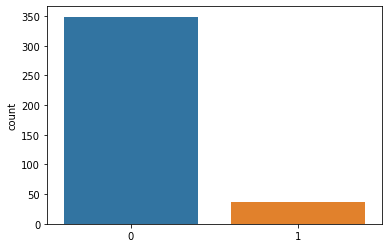

In [121]:
predictions = metrics.accuracy_score(y_test,clf.predict(X_test))
prediction_class = clf.predict(X_test)
sn.countplot(prediction_class)

## HyperParameter Tuning

In [125]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.015,0.012,0.010,0.016,0.020,0.025]
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.015,0.012,0.010,0.016,0.020,0.025]
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
#     'Lightgbm':{
#         'model':LGBMClassifier(),
#         'params':{
#             'class_weight':[None,'balanced'],
#             'boosting_type':['gbdt','goss','dart'],
#             'num_leaves':list(range(30,100)),
#             'learning_rate':list(np.logspace(np.log(0.005),np.log(0.2),
#                                              base = np.exp(1),num = 1000)),
                  
#             'subsample_for_bin':list(range(20000,300000,20000)),
#             'min_child_samples':list(range(20,500,5)),
#             'reg_alpha':list(np.linspace(0,1)),
#             'reg_lambda':list(np.linspace(0,1)),
#             'colsample_bytree':list(np.linspace(0.6,1,10))
#         }
    
}

In [126]:
scores = []
for model,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],
                            cv = 5,n_iter=10,n_jobs=-1,scoring='accuracy')
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=84).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [127]:
scores_df = pd.DataFrame(scores,columns = ['model_name',
                                           'best_score',
                                          'best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,0.929205,"(DecisionTreeClassifier(ccp_alpha=0.012, max_d..."
1,logistic,0.858381,"LogisticRegression(C=0.75, max_iter=167, multi..."
2,D-tree,0.929220,"DecisionTreeClassifier(ccp_alpha=0.012, criter..."
3,SVM,0.858381,"SVC(kernel='sigmoid', max_iter=84, tol=0.025)"


In [132]:
for i in scores_df['best_estimator']:
    print(i)
    print("="*75)

RandomForestClassifier(ccp_alpha=0.012, max_depth=30, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=800)
LogisticRegression(C=0.75, max_iter=167, multi_class='ovr', solver='saga',
                   tol=0.025)
DecisionTreeClassifier(ccp_alpha=0.012, criterion='entropy',
                       max_features='auto', min_samples_leaf=2,
                       min_samples_split=5)
SVC(kernel='sigmoid', max_iter=84, tol=0.025)


In [133]:
# Using Voting Classifier

rf = RandomForestClassifier(ccp_alpha=0.012, max_depth=30, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=800)
lr = LogisticRegression(C=0.75, max_iter=167, multi_class='ovr', solver='saga',
                   tol=0.025)

dt = DecisionTreeClassifier(ccp_alpha=0.012, criterion='entropy',
                       max_features='auto', min_samples_leaf=2,
                       min_samples_split=5)

svm = SVC(kernel='sigmoid', max_iter=84, tol=0.025)

vlf = VotingClassifier(

    estimators=[('rf',rf),('lr',lr),('dt',dt),('svm',svm)],
    voting='hard'
)

vlf.fit(X_train,y_train)
vlf.score(X_test,y_test)

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=84).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.8730569948186528

In [134]:
rf = RandomForestClassifier(ccp_alpha=0.012, max_depth=30, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=800)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.927461139896373

In [135]:
dt = DecisionTreeClassifier(ccp_alpha=0.012, criterion='entropy',
                       max_features='auto', min_samples_leaf=2,
                       min_samples_split=5)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.8911917098445595

In [136]:
## Exploring Random Forest

predictions = rf.predict(X_test)
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       337
           1       0.86      0.51      0.64        49

    accuracy                           0.93       386
   macro avg       0.90      0.75      0.80       386
weighted avg       0.92      0.93      0.92       386



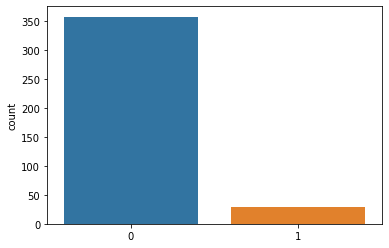

In [137]:
sn.countplot(predictions)

## Testing Random Forest on Testing Dataset

In [185]:
test = pd.read_csv('finaltest.csv')
test.head()

,Unnamed: 0,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,0,33,8,0,0,3,8628,0,2442,145,0,233531,265618,0,2,455,126,274
1,1,27,38,1,0,3290,6384,10278,1808,144,129639,356952,280429,199414,1,455,181,274
2,2,27,38,1,0,3290,6384,10278,1808,144,129639,356952,280429,199414,1,455,181,274
3,3,15,0,2,0,3296,3370,10239,1801,144,129408,355768,280429,360833,1,455,181,274
4,4,15,0,2,0,3296,3370,10239,1801,144,129408,355768,280429,360833,1,455,181,274


In [186]:
test = test.drop(['Unnamed: 0'],axis = 1)
test.head(3)

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,33,8,0,0,3,8628,0,2442,145,0,233531,265618,0,2,455,126,274
1,27,38,1,0,3290,6384,10278,1808,144,129639,356952,280429,199414,1,455,181,274
2,27,38,1,0,3290,6384,10278,1808,144,129639,356952,280429,199414,1,455,181,274


In [187]:
def plotboxcox(df,col):
    
      plt.figure(figsize = (16,9))
      plt.subplot(1,3,1)
      plt.hist(df[col],color = 'salmon')

      plt.subplot(1,3,2)
      stats.probplot(df[col],dist = 'norm',plot = plt)

      plt.subplot(1,3,3)
      sn.boxplot(df[col],color = 'red')

      plt.show()

In [188]:
boxcox_list = ['clientid','pubclientid','siteId',
               'goalid','adslotdimid','ispDimId','itmClmbLId']

temp = test.copy()
for i in boxcox_list:
    temp[i],params = stats.boxcox(temp[i]+1)
    
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,153.486809,4.392208,0,0,1.535978,31681.628917,0,2442,145,0,4.163766e+13,35146.190289,0,2,455,116.56259,274
1,113.353172,12.448063,1,0,15.456667,22340.408294,10278,1808,144,129639,1.262680e+14,36750.170567,199414,1,455,166.27045,274
2,113.353172,12.448063,1,0,15.456667,22340.408294,10278,1808,144,129639,1.262680e+14,36750.170567,199414,1,455,166.27045,274
3,47.144886,0.000000,2,0,15.462585,10649.279811,10239,1801,144,129408,1.251758e+14,36750.170567,360833,1,455,166.27045,274
4,47.144886,0.000000,2,0,15.462585,10649.279811,10239,1801,144,129408,1.251758e+14,36750.170567,360833,1,455,166.27045,274


 Distribution for clientid is shown ↓


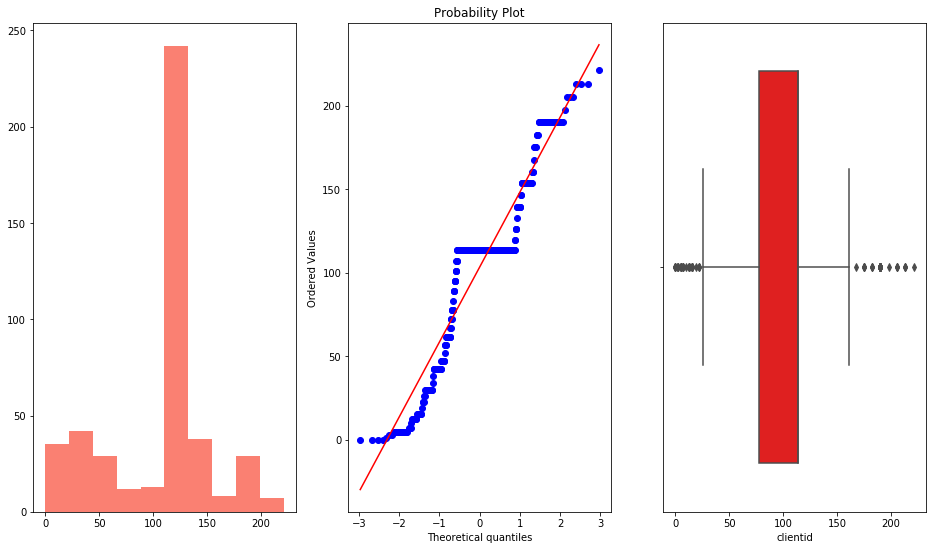

----------------------------------------------------------------------------------------------------
 Distribution for pubclientid is shown ↓


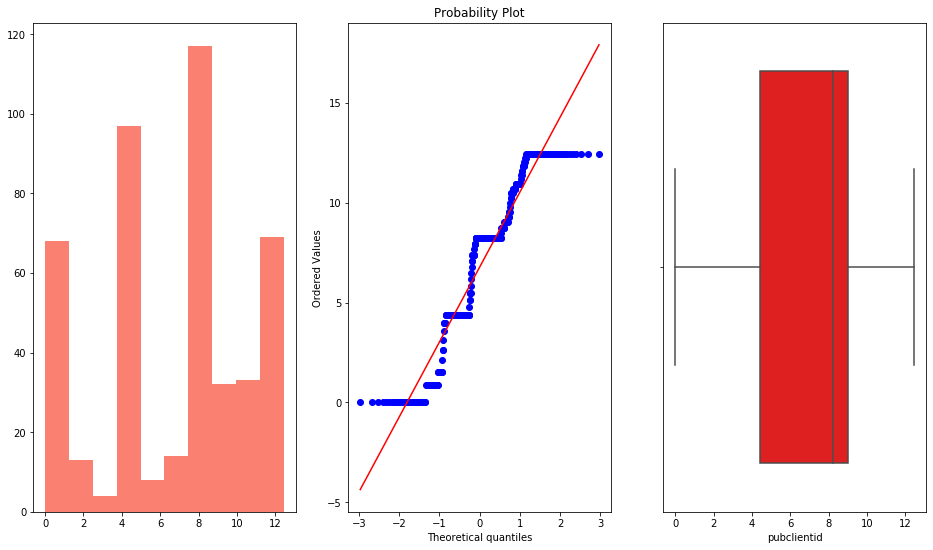

----------------------------------------------------------------------------------------------------
 Distribution for siteId is shown ↓


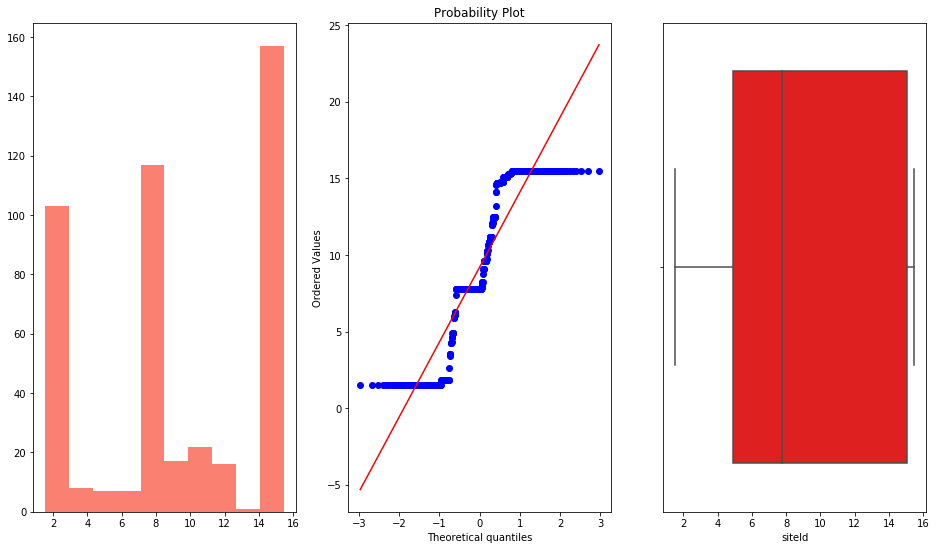

----------------------------------------------------------------------------------------------------
 Distribution for goalid is shown ↓


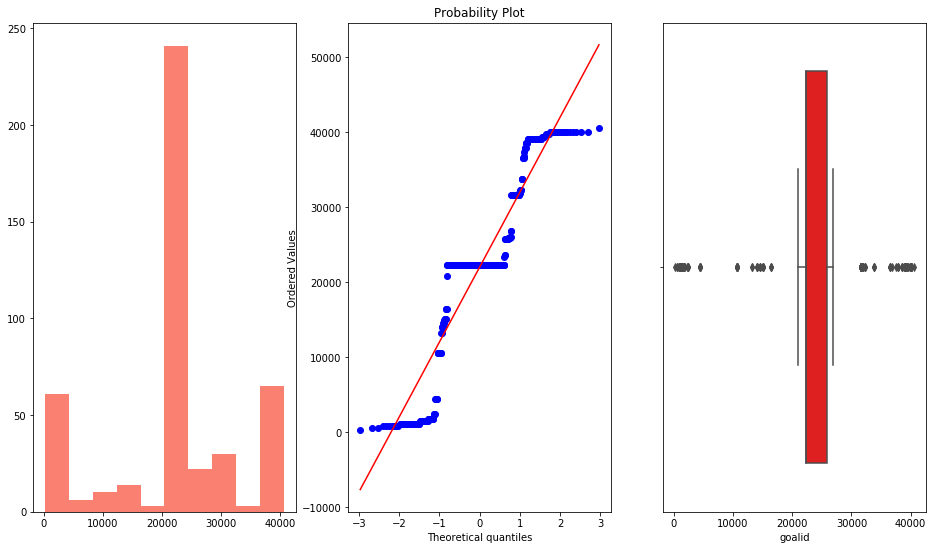

----------------------------------------------------------------------------------------------------
 Distribution for adslotdimid is shown ↓


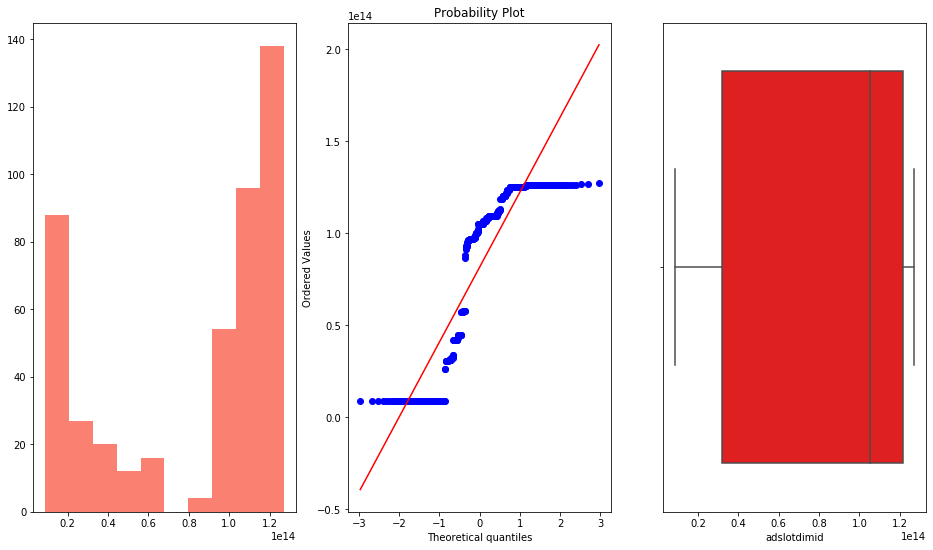

----------------------------------------------------------------------------------------------------
 Distribution for ispDimId is shown ↓


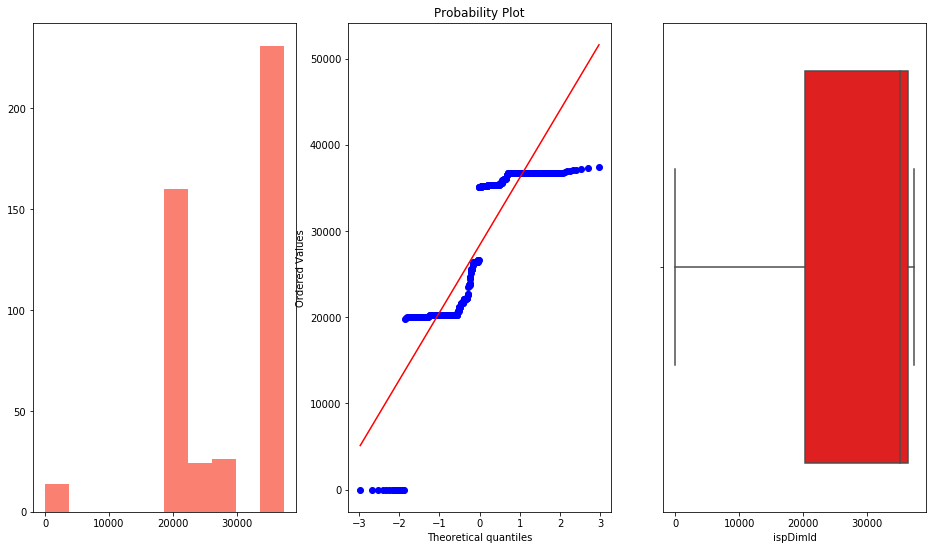

----------------------------------------------------------------------------------------------------
 Distribution for itmClmbLId is shown ↓


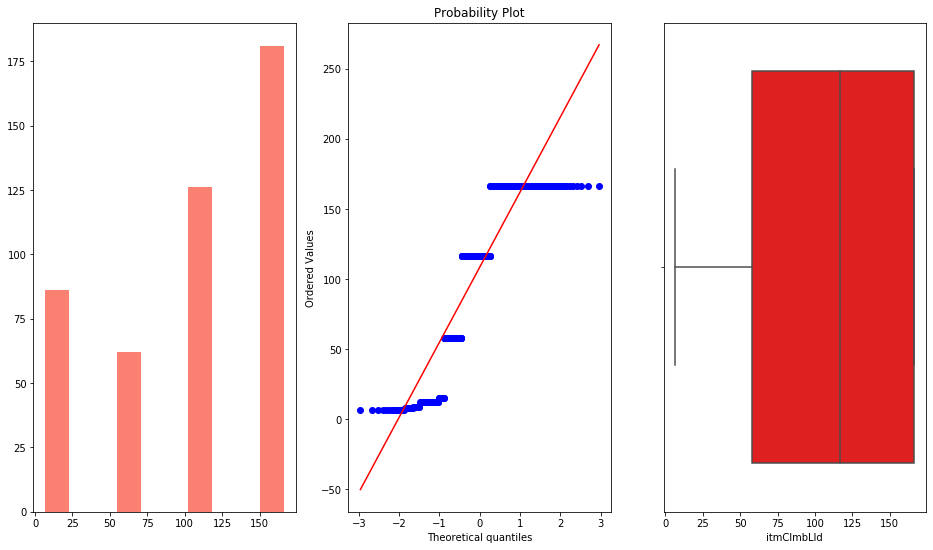

----------------------------------------------------------------------------------------------------


In [189]:
for i in boxcox_list:
    print(f' Distribution for {i} is shown ↓')
    plotboxcox(temp,i)
    print("-"*100)

In [190]:
# Removing outliers using IQR (Inter Quantile Range)

def quantile(df,val):
    a = []
    df_25 = df[val].quantile(0.25)
    df_75 = df[val].quantile(0.75)
    iqr = df_75-df_25
    upper_limit = float(df_75+(iqr*1.5))
    lower_limit = float(df_25-(iqr*1.5))
    
    for i in df[val]:
        if i>upper_limit:
            i = np.NaN
        
        elif i<lower_limit:
            i = np.NaN
            
        else:
            i = i
            
        a.append(i)
        
    return a

outlier_removal = ['clientid','pubclientid','siteId',
               'goalid','adslotdimid','ispDimId','itmClmbLId']

for i in outlier_removal:
    temp[i] = quantile(temp,i)
    

In [191]:
temp.isnull().sum()

clientid         79
pubclientid       0
clmbuserid        0
imprid            0
siteId            0
goalid          192
cityId            0
stateId           0
countryDimId      0
browserId         0
adslotdimid       0
ispDimId          0
osVerDimId        0
clickIp           0
crtd              0
itmClmbLId        0
devTypeDimId      0
dtype: int64

In [192]:
def fillnavalues(colname):
    temp[colname+'_mean'] = temp[colname].fillna(temp[colname].mean())
    temp[colname+'_median'] = temp[colname].fillna(temp[colname].median())
    temp[colname+'_mode'] = temp[colname].fillna(temp[colname].mode()[0])

In [193]:
def maps(df,col):
    
    plt.figure(figsize=(20,7))
    plt.subplot(1,3,1)
    sn.distplot(df[col],kde=True,hist=False,color='red',label=col)
    sn.distplot(df[col+'_mean'],kde=True,hist=False,color='black',label=col+'_mean')
    
    plt.subplot(1,3,2)
    sn.distplot(df[col],kde=True,hist=False,color='red',label=col)
    sn.distplot(df[col+'_median'],kde=True,hist=False,color='black',label=col+'_median')
    
    plt.subplot(1,3,3)
    sn.distplot(df[col],kde=True,hist=False,color='red',label=col)
    sn.distplot(df[col+'_mode'],kde=True,hist=False,color='black',label=col+'_mode')
    
    plt.show()
    

 
col_list = ['clientid','goalid']
for i in col_list:
    fillnavalues(i)

 Distribution analysis for col : clientid is shown ↓


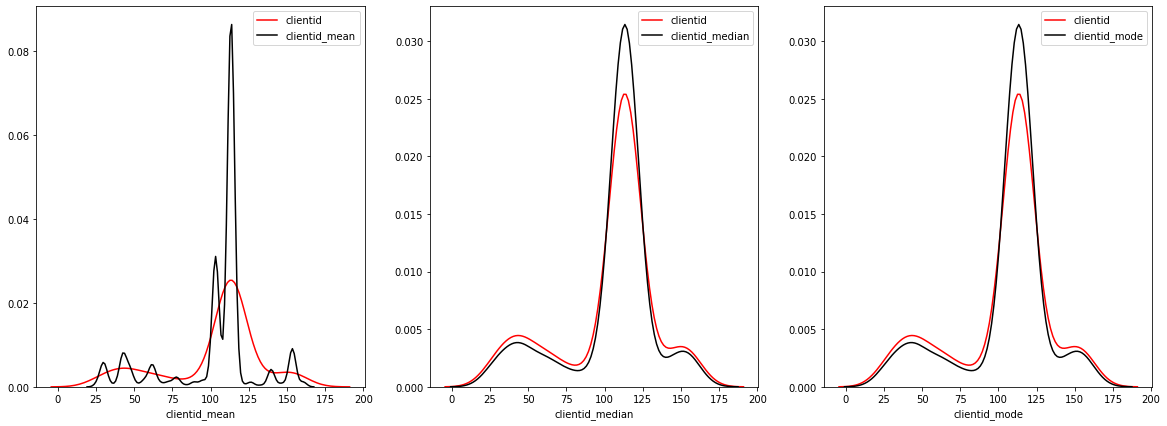

 Distribution analysis for col : goalid is shown ↓


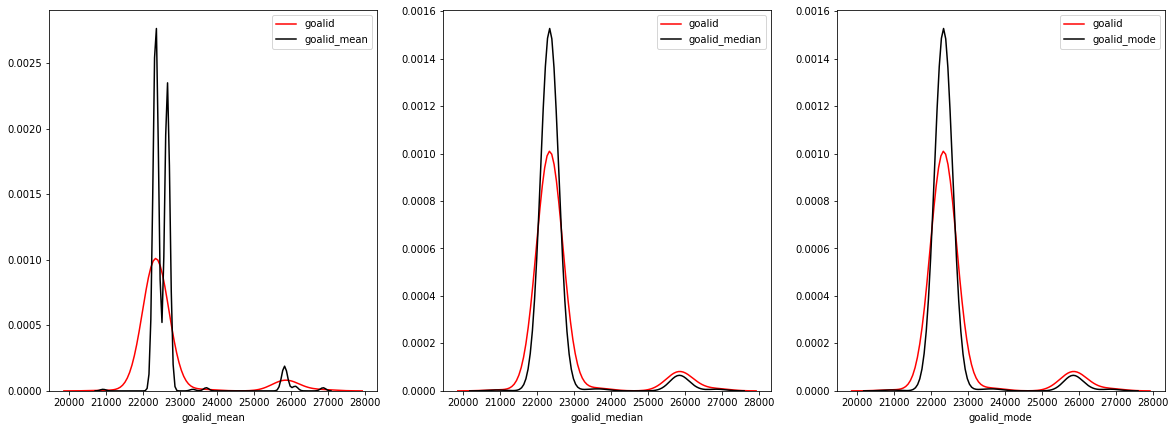

In [194]:
for i in col_list:
    print(f' Distribution analysis for col : {i} is shown ↓')
    maps(temp,i)
    print("="*100)
    
    

In [195]:
temp.isnull().sum()

clientid            79
pubclientid          0
clmbuserid           0
imprid               0
siteId               0
goalid             192
cityId               0
stateId              0
countryDimId         0
browserId            0
adslotdimid          0
ispDimId             0
osVerDimId           0
clickIp              0
crtd                 0
itmClmbLId           0
devTypeDimId         0
clientid_mean        0
clientid_median      0
clientid_mode        0
goalid_mean          0
goalid_median        0
goalid_mode          0
dtype: int64

In [201]:
test.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,33,8,0,0,3,8628,0,2442,145,0,233531,265618,0,2,455,126,274
1,27,38,1,0,3290,6384,10278,1808,144,129639,356952,280429,199414,1,455,181,274
2,27,38,1,0,3290,6384,10278,1808,144,129639,356952,280429,199414,1,455,181,274
3,15,0,2,0,3296,3370,10239,1801,144,129408,355768,280429,360833,1,455,181,274
4,15,0,2,0,3296,3370,10239,1801,144,129408,355768,280429,360833,1,455,181,274


In [203]:
maximin = max(test['goalid'])-min(test['goalid'])
temp['goalid'] = temp['goalid'].fillna(maximin)

maximin2 = max(test['clientid'])-min(test['clientid'])
temp['clientid'] = temp['clientid'].fillna(maximin2)

temp.isnull().sum()

clientid           0
pubclientid        0
clmbuserid         0
imprid             0
siteId             0
goalid             0
cityId             0
stateId            0
countryDimId       0
browserId          0
adslotdimid        0
ispDimId           0
osVerDimId         0
clickIp            0
crtd               0
itmClmbLId         0
devTypeDimId       0
clientid_mean      0
clientid_median    0
clientid_mode      0
goalid_mean        0
goalid_median      0
goalid_mode        0
dtype: int64

**Training Selected Process Only!**


In [204]:
temp = temp[['clientid', 'pubclientid', 'clmbuserid', 
             'imprid', 'siteId', 'cityId', 'stateId', 
             'adslotdimid', 'ispDimId', 'osVerDimId', 
             'itmClmbLId', 'devTypeDimId']
]
temp.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,cityId,stateId,adslotdimid,ispDimId,osVerDimId,itmClmbLId,devTypeDimId
0,153.486809,4.392208,0,0,1.535978,0,2442,4.163766e+13,35146.190289,0,116.56259,274
1,113.353172,12.448063,1,0,15.456667,10278,1808,1.262680e+14,36750.170567,199414,166.27045,274
2,113.353172,12.448063,1,0,15.456667,10278,1808,1.262680e+14,36750.170567,199414,166.27045,274
3,47.144886,0.000000,2,0,15.462585,10239,1801,1.251758e+14,36750.170567,360833,166.27045,274
4,47.144886,0.000000,2,0,15.462585,10239,1801,1.251758e+14,36750.170567,360833,166.27045,274


In [205]:
temp.shape

(455, 12)

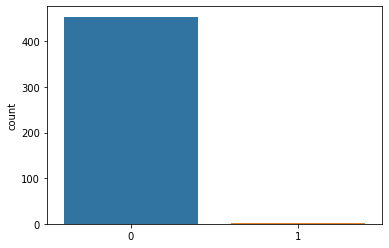

In [206]:
predictions = rf.predict(temp)
sn.countplot(predictions)

In [208]:
print(dict(Counter(predictions)))

{0: 454, 1: 1}


In [209]:
for i in scores_df['best_estimator']:
    print(i)
    print("="*75)

RandomForestClassifier(ccp_alpha=0.012, max_depth=30, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=800)
LogisticRegression(C=0.75, max_iter=167, multi_class='ovr', solver='saga',
                   tol=0.025)
DecisionTreeClassifier(ccp_alpha=0.012, criterion='entropy',
                       max_features='auto', min_samples_leaf=2,
                       min_samples_split=5)
SVC(kernel='sigmoid', max_iter=84, tol=0.025)


In [215]:
dt = DecisionTreeClassifier(ccp_alpha=0.012, criterion='entropy',
                       max_features='auto', min_samples_leaf=2,
                       min_samples_split=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, criterion='entropy',
                       max_features='auto', min_samples_leaf=2,
                       min_samples_split=5)

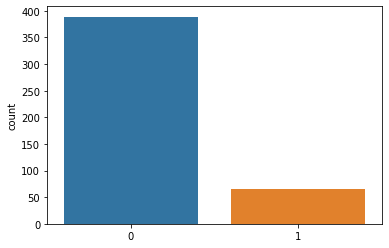

In [240]:
predictions = dt.predict(temp)
sn.countplot(predictions)

In [241]:
submission = pd.read_csv('sample_submission.csv')
submission.shape

(455, 2)

In [242]:
submission['conversion_fraud']=predictions
submission.head()

,record_id,conversion_fraud
0,1000,1
1,1001,1
2,1002,1
3,1003,1
4,1004,1


In [243]:
mapper = {1:True,0:False}
submission['conversion_fraud'] = submission['conversion_fraud'].map(mapper)
submission.head()

,record_id,conversion_fraud
0,1000,True
1,1001,True
2,1002,True
3,1003,True
4,1004,True


In [244]:
submission.to_csv('DTREEPRED.csv',index=False)

---------------------------`Done with Dtree`-------------------------------

In [235]:
len(predictions)

455

In [217]:
print(dict(Counter(predictions)))

{1: 66, 0: 389}


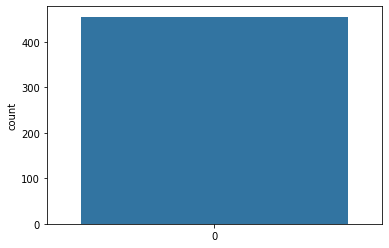

In [218]:
lr = LogisticRegression(C=0.75, max_iter=167, multi_class='ovr', solver='saga',
                   tol=0.025)
lr.fit(X_train,y_train)
predictions = lr.predict(temp)
sn.countplot(predictions)

C:\Users\meet\anaconda3\envs\tensorflow_ennv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=84).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


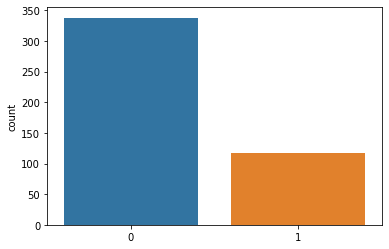

In [220]:
sv = SVC(kernel='sigmoid', max_iter=84, tol=0.025)
sv.fit(X_train,y_train)
predictions = sv.predict(temp)
sn.countplot(predictions)

In [221]:
print(dict(Counter(predictions)))

{0: 338, 1: 117}


{0: 455}


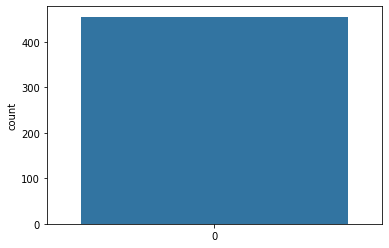

In [222]:
# -----------> Trying out with lgbm<-------------------------

lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.8666666666666667, importance_type='split',
               learning_rate=0.061583063540367876, max_depth=-1,
               min_child_samples=375, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=35,
               objective=None, random_state=None, reg_alpha=0.836734693877551,
               reg_lambda=0.9795918367346939, silent=True, subsample=1.0,
               subsample_for_bin=260000, subsample_freq=0)

lgbm.fit(X_train,y_train)
predictions = lgbm.predict(temp)
sn.countplot(predictions)
print(dict(Counter(predictions)))

In [226]:
# ------------------> Trying out with XGBoost<--------------------------

xgb = XGBRFClassifier(base_score=0.5, colsample_bylevel=1,
                                       colsample_bynode=0.8,
                                       colsample_bytree=0.8, gamma=0,
                                       learning_rate=0.1, max_delta_step=0,
                                       max_depth=5, min_child_weight=1,
                                       missing=None, n_estimators=140, n_jobs=1,
                                       nthread=4, objective='binary:logistic',
                                       random_state=0, reg_alpha=0,
                                       reg_lambda=1, scale_pos_weight=1,
                                       seed=27, silent=None, subsample=0.8,
                                       verbosity=1)
xgb.fit(X_train.values,y_train)
predictions = xgb.predict(temp.values)
print(dict(Counter(predictions)))

{0: 453, 1: 2}


### Optimising Decision Tree using Fast AI

In [1]:
from fastai.tabular.all import *
from fastai.tabular import *

from sklearn.linear_model import Lasso, LinearRegression,Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

import numpy as np 
import pandas as pd 

import seaborn as sn
import matplotlib.pyplot as plt

# from sklearn.utils.testing import all_estimators
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier

In [228]:
train.shape

(965, 17)

In [2]:
train = pd.read_csv('finaluse.csv')
test = pd.read_csv('finaltest.csv')

In [3]:
train.head()

,Unnamed: 0,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,0,36,4,0,0,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,True,2,965,126,285
1,1,36,17,1,1,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,True,1,965,181,285
2,2,36,4,0,0,34,6384,0.0,1812.0,144.0,129639.0,321554,172725.0,199452.0,True,1,965,181,285
3,3,36,4,0,0,34,6384,10300.0,1815.0,144.0,129639.0,321300,136127.0,199452.0,True,1,965,181,285
4,4,19,0,3,0,3296,3370,0.0,1818.0,144.0,129408.0,355768,136127.0,360833.0,True,1,965,181,285


In [4]:
train = train.drop(['Unnamed: 0'],axis = 1)
train.head(3)

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,36,4,0,0,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,True,2,965,126,285
1,36,17,1,1,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,True,1,965,181,285
2,36,4,0,0,34,6384,0.0,1812.0,144.0,129639.0,321554,172725.0,199452.0,True,1,965,181,285


In [5]:
test = test.drop(['Unnamed: 0'],axis = 1)
test.head(3)

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,clickIp,crtd,itmClmbLId,devTypeDimId
0,33,8,0,0,3,8628,0,2442,145,0,233531,265618,0,2,455,126,274
1,27,38,1,0,3290,6384,10278,1808,144,129639,356952,280429,199414,1,455,181,274
2,27,38,1,0,3290,6384,10278,1808,144,129639,356952,280429,199414,1,455,181,274


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['conversion_fraud'] = le.fit_transform(train['conversion_fraud'])
train.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,goalid,cityId,stateId,countryDimId,browserId,adslotdimid,ispDimId,osVerDimId,conversion_fraud,clickIp,crtd,itmClmbLId,devTypeDimId
0,36,4,0,0,34,6384,436.0,1806.0,144.0,129639.0,321300,280429.0,199452.0,1,2,965,126,285
1,36,17,1,1,178,6384,10314.0,1817.0,144.0,129639.0,129239,136127.0,199452.0,1,1,965,181,285
2,36,4,0,0,34,6384,0.0,1812.0,144.0,129639.0,321554,172725.0,199452.0,1,1,965,181,285
3,36,4,0,0,34,6384,10300.0,1815.0,144.0,129639.0,321300,136127.0,199452.0,1,1,965,181,285
4,19,0,3,0,3296,3370,0.0,1818.0,144.0,129408.0,355768,136127.0,360833.0,1,1,965,181,285


In [7]:
Target_col = 'conversion_fraud'
selected_columns = ['clientid', 'pubclientid', 'clmbuserid', 
             'imprid', 'siteId', 'cityId', 'stateId', 
             'adslotdimid', 'ispDimId', 'osVerDimId', 
             'itmClmbLId', 'devTypeDimId']
X = train[selected_columns]
y = train[Target_col].values
X_test = test[selected_columns]
new_x = train[selected_columns+[Target_col]]

In [10]:
X.head()

,clientid,pubclientid,clmbuserid,imprid,siteId,cityId,stateId,adslotdimid,ispDimId,osVerDimId,itmClmbLId,devTypeDimId
0,36,4,0,0,34,436.0,1806.0,321300,280429.0,199452.0,126,285
1,36,17,1,1,178,10314.0,1817.0,129239,136127.0,199452.0,181,285
2,36,4,0,0,34,0.0,1812.0,321554,172725.0,199452.0,181,285
3,36,4,0,0,34,10300.0,1815.0,321300,136127.0,199452.0,181,285
4,19,0,3,0,3296,0.0,1818.0,355768,136127.0,360833.0,181,285


In [12]:
cont_names = list(X.columns)
procs = [Categorify, FillMissing, Normalize]

In [20]:
def roc_auc(y_hat, y):
  # print(y_hat.shape, y.shape)
  return torch.tensor(metrics.accuracy( y.cpu(), y_hat.cpu()))

In [21]:
predictions = np.zeros(X_test.shape[0])
oobs = np.zeros(train.shape[0])
y = train['conversion_fraud'].values


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_id, valid_id) in enumerate(skf.split(X,y)):
  X_valid= X.iloc[valid_id]
  ssd = IndexSplitter(list(valid_id))
  to = TabularPandas(new_x, procs=procs,
                    cont_names = cont_names,
                    y_names='conversion_fraud',
                    splits=ssd(X.index))
  dls = to.dataloaders(bs=64)
  learn = tabular_learner(dls, metrics=accuracy)
  
  learn.fit_one_cycle(10,cbs=[SaveModelCallback(monitor='accuracy', fname='shri')])
  learn.load('./shri')
  valid_dl = learn.dls.test_dl(X_valid)
  oobs[valid_id] = np.ravel(learn.get_preds(dl=valid_dl)[0])
  test_dl = learn.dls.test_dl(X_test)
  predictions += np.ravel(learn.get_preds(dl=test_dl)[0])

epoch,train_loss,valid_loss,accuracy,time
0,0.460857,0.135670,0.860104,00:00
1,0.312092,0.101484,0.860104,00:00
2,0.227931,0.085123,0.860104,00:00
3,0.176430,0.072917,0.860104,00:00
4,0.142707,0.074262,0.860104,00:00
5,0.119729,0.068698,0.860104,00:00
6,0.102734,0.070399,0.860104,00:00
7,0.090673,0.067896,0.860104,00:00
8,0.080477,0.065436,0.860104,00:00
9,0.072931,0.065424,0.860104,00:00


Better model found at epoch 0 with accuracy value: 0.8601036071777344.


d:\mlai\mlmajor\kaggle\intern\hacka\analytics vidya\avshacka\suggested submissions\the finals!\fastai\fastai\learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,accuracy,time
0,0.298509,0.138044,0.865285,00:00
1,0.225776,0.113677,0.865285,00:00
2,0.170049,0.102514,0.865285,00:00
3,0.136236,0.091701,0.865285,00:00
4,0.113595,0.087091,0.865285,00:00
5,0.098128,0.082739,0.865285,00:00
6,0.086623,0.084703,0.865285,00:00
7,0.077117,0.081667,0.865285,00:00
8,0.069940,0.080204,0.865285,00:00
9,0.064878,0.080995,0.865285,00:00


Better model found at epoch 0 with accuracy value: 0.8652849793434143.


epoch,train_loss,valid_loss,accuracy,time
0,0.238111,0.134096,0.865285,00:00
1,0.183183,0.120002,0.865285,00:00
2,0.147431,0.115283,0.865285,00:00
3,0.124460,0.102455,0.865285,00:00
4,0.107538,0.077907,0.865285,00:00
5,0.094487,0.068574,0.865285,00:00
6,0.083531,0.072861,0.865285,00:00
7,0.074963,0.073121,0.865285,00:00
8,0.067877,0.071275,0.865285,00:00
9,0.063633,0.070559,0.865285,00:00


Better model found at epoch 0 with accuracy value: 0.8652849793434143.


epoch,train_loss,valid_loss,accuracy,time
0,0.366338,0.110093,0.865285,00:00
1,0.267191,0.093663,0.865285,00:00
2,0.208546,0.093872,0.865285,00:00
3,0.168941,0.071610,0.865285,00:00
4,0.137770,0.079380,0.865285,00:00
5,0.118254,0.069463,0.865285,00:00
6,0.101942,0.071728,0.865285,00:00
7,0.089763,0.069446,0.865285,00:00
8,0.080256,0.066383,0.865285,00:00
9,0.072416,0.066195,0.865285,00:00


Better model found at epoch 0 with accuracy value: 0.8652849793434143.


epoch,train_loss,valid_loss,accuracy,time
0,0.301654,0.109980,0.865285,00:00
1,0.223518,0.091391,0.865285,00:00
2,0.168312,0.073003,0.865285,00:00
3,0.134394,0.068340,0.865285,00:00
4,0.112153,0.065513,0.865285,00:00
5,0.096307,0.064274,0.865285,00:00
6,0.084062,0.064180,0.865285,00:00
7,0.076534,0.063225,0.865285,00:00
8,0.069601,0.062347,0.865285,00:00
9,0.064088,0.062202,0.865285,00:00


Better model found at epoch 0 with accuracy value: 0.8652849793434143.


In [22]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,record_id,conversion_fraud
0,1000,True
1,1001,True
2,1002,True
3,1003,True
4,1004,True


In [23]:
roc_auc = roc_auc_score(y,oobs)
print(roc_auc)
# finals = predictions/5
# # fastai_preds = finals
# # sample_submission[Target_col] = fastai_preds
# # sample_submission.to_csv('fastai.csv', index=False)
# # sample_submission[Target_col] = fastai_preds
# sn.countplot(finals)

0.7125093818075309
